<a href="https://colab.research.google.com/github/da-head0/Female-led-Korean-Films/blob/master/Game_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Ï†ÑÏ≤òÎ¶¨

In [148]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 12 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,519 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 146364 files and d

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic') 

In [150]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
df

Unnamed: 0  ... Other_Sales
0               1  ...           0
1               2  ...        0.01
2               3  ...           0
3               4  ...           0
4               5  ...        0.04
...           ...  ...         ...
16593       16594  ...        0.01
16594       16595  ...           0
16595       16596  ...        0.13
16596       16597  ...        0.03
16597       16598  ...        0.01

[16598 rows x 10 columns]

In [151]:
del df['Unnamed: 0']

In [152]:
sales_df = df[['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']]

In [153]:
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [154]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [155]:
#Í∏∞Ï°¥ YearÏó¥ Îç∞Ïù¥ÌÑ∞Î•º Î∞îÌÉïÏúºÎ°ú NaNÍ∞íÏùÑ Ï±ÑÏõåÏ§å

df.Year = df.Year.interpolate(method='pad', limit=2) 

In [156]:
#Year Ìñâ Ï†ïÏàòÎ°ú Î≥ÄÌôò

df = df.astype({'Year': 'int'}) 

In [157]:
# Ïó∞ÎèÑ ÎßûÏ∂∞Ï£ºÍ∏∞

for i, year in enumerate(df['Year']):
  if year <50:
    df.loc[i,'Year'] = year + 2000
  if (50<= year <100 ):
    df.loc[i,'Year'] = year + 1900
  else:
    continue


In [158]:
df.groupby(by='Year').count().head(60)

Name  Platform  Genre  ...  EU_Sales  JP_Sales  Other_Sales
Year                         ...                                 
1980    10        10      9  ...        10        10           10
1981    46        46     46  ...        46        46           46
1982    37        37     37  ...        37        37           37
1983    17        17     17  ...        17        17           17
1984    14        14     14  ...        14        14           14
1985    14        14     14  ...        14        14           14
1986    21        21     21  ...        21        21           21
1987    16        16     16  ...        16        16           16
1988    15        15     15  ...        15        15           15
1989    18        18     18  ...        18        18           18
1990    16        16     16  ...        16        16           16
1991    41        41     41  ...        41        41           41
1992    43        43     43  ...        43        43           43
1993    63        63     63  ...        63        63           63
1994   122       122    122  ...       122       122          122
1995   221       221    221  ...       221       221          221
1996   267       267    266  ...       267       267          267
1997   293       293    293  ...       293       293          293
1998   386       386    384  ...       386       386          386
1999   346       346    344  ...       346       346          346
2000   354       354    353  ...       354       354          354
2001   489       489    487  ...       489       489          489
2002   844       844    841  ...       844       844          844
2003   790       790    789  ...       790       790          790
2004   768       768    764  ...       768       768          768
2005   954       954    952  ...       954       954          954
2006  1021      1021   1018  ...      1021      1021         1021
2007  1230      1230   1224  ...      1230      1230         1230
2008  1452      1452   1447  ...      1452      1452         1452
2009  1453      1453   1450  ...      1453      1453         1453
2010  1280      1280   1276  ...      1280      1280         1280
2011  1159      1159   1156  ...      1159      1159         1159
2012   667       667    664  ...       667       667          667
2013   556       556    555  ...       556       556          556
2014   589       589    589  ...       589       589          589
2015   629       629    626  ...       629       629          629
2016   353       353    353  ...       353       353          353
2017     3         3      3  ...         3         3            3
2020     1         1      1  ...         1         1            1

[39 rows x 8 columns]

ÏûêÎ£åÎäî 1980ÎÖÑÎ∂ÄÌÑ∞ 2020ÎÖÑÍπåÏßÄ ÏûàÏßÄÎßå, 2017ÎÖÑ Ï∂úÏãúÎêú Í≤åÏûÑÏùÄ 3Í∞ú, 2020ÎÖÑÏóê Ï∂úÏãúÎêú Í≤åÏûÑÏùÄ 1Í∞ú ÏûàÎã§Îäî Í≤ÉÏóê Ïú†ÏùòÌïúÎã§.

In [159]:
for col in sales_df.columns:
  df[col] = df[col].str.replace('M','')  # remove M

In [160]:
# KÍ∞í ÏßÄÏö∞Í≥† Ìï¥Îãπ Ïó¥Ïóê ÎåÄÌï¥ 0.001Î∞∞
for col in sales_df.columns:
  for i, sale in enumerate(df[col]):
    if sale.endswith('K'):
      df.loc[i,col] = float(df.loc[i,col].replace('K',''))*0.001
    else:
      continue

In [161]:
# Sales ÏπºÎüºÎì§ Ïà´ÏûêÌòïÏúºÎ°ú Î≥ÄÌôò
for col in sales_df.columns:
  df[col] = pd.to_numeric(df[col])
  df[col] = df[col]*1000 #Í∏∞Î≥∏ Îã®ÏúÑÎ•º KÎ°ú Î≥ÄÍ≤Ω

In [162]:
df.dtypes

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [163]:
df['Name'] = df['Name'].str.replace('Ï±ï','e') #Ïù¥Î¶ÑÏóê ÌïúÍ∏Ä Îì§Ïñ¥Í∞Ñ Í±∞ ÏßÄÏõåÏ£ºÍ∏∞
df['Name'] = df['Name'].str.replace('Ïßï','')

In [164]:
df.groupby(by='Platform').count()

Name  Year  Genre  ...  EU_Sales  JP_Sales  Other_Sales
Platform                     ...                                 
2600       133   133    132  ...       133       133          133
3DO          3     3      3  ...         3         3            3
3DS        509   509    508  ...       509       509          509
DC          52    52     52  ...        52        52           52
DS        2163  2163   2159  ...      2163      2163         2163
GB          98    98     98  ...        98        98           98
GBA        822   822    820  ...       822       822          822
GC         556   556    555  ...       556       556          556
GEN         27    27     27  ...        27        27           27
GG           1     1      1  ...         1         1            1
N64        319   319    316  ...       319       319          319
NES         98    98     98  ...        98        98           98
NG          12    12     12  ...        12        12           12
PC         960   960    957  ...       960       960          960
PCFX         1     1      1  ...         1         1            1
PS        1196  1196   1192  ...      1196      1196         1196
PS2       2161  2161   2155  ...      2161      2161         2161
PS3       1329  1329   1324  ...      1329      1329         1329
PS4        336   336    335  ...       336       336          336
PSP       1213  1213   1209  ...      1213      1213         1213
PSV        413   413    412  ...       413       413          413
SAT        173   173    173  ...       173       173          173
SCD          6     6      6  ...         6         6            6
SNES       239   239    239  ...       239       239          239
TG16         2     2      2  ...         2         2            2
WS           6     6      6  ...         6         6            6
Wii       1325  1325   1319  ...      1325      1325         1325
WiiU       143   143    143  ...       143       143          143
X360      1265  1265   1262  ...      1265      1265         1265
XB         824   824    820  ...       824       824          824
XOne       213   213    212  ...       213       213          213

[31 rows x 8 columns]

2600ÏùÄ Atari 2600ÏùÑ ÎßêÌïòÎäî Í±∞ Í∞ôÎã§. 1977ÎÖÑ 10Ïõî Î∞úÎß§Îêú Í∞ÄÏ†ïÏö© Í≤åÏûÑÍ∏∞Î°ú ÎßàÏù¥ÌÅ¨Î°úÌîÑÎ°úÏÑ∏ÏÑúÏôÄ Ïπ¥Ìä∏Î¶¨ÏßÄ Î∞©ÏãùÏùÑ ÏÇ¨Ïö©ÌïòÏòÄÎã§Í≥†.

In [165]:
#ÏÑ∏ÏùºÏ¶à Îß§Ï∂úÏóê ÎåÄÌïú Ìï©Í≥Ñ, ÌèâÍ∑† Í≥ÑÏÇ∞ÌïòÍ∏∞
sales_df = df[['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']]

df['Sales_Sum'] = df['NA_Sales']+df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df['Sales_Mean'] = df['Sales_Sum']/4

In [166]:
df[(df.Genre.isnull()) & (df['Sales_Mean']>500)]

Name Platform  ...  Sales_Sum Sales_Mean
1971            Pokemon X/Pokemon Y      3DS  ...    14350.0     3587.5
4598                      Wii Party      Wii  ...     8490.0     2122.5
9488              Final Fantasy XII      PS2  ...     5950.0     1487.5
12331            Onimusha: Warlords      PS2  ...     2700.0      675.0
15526                    Bloodborne      PS4  ...     2380.0      595.0
16587  Need for Speed Underground 2       XB  ...     2280.0      570.0

[6 rows x 11 columns]

In [167]:
df.iloc[1971,3] = 'Role-Playing'
df.iloc[4598,3] = 'Misc' #Wii Party	- PartyÏù∏Îç∞ ÏùºÎã® MiscÎ°ú ÎÑ£Ïùå.
df.iloc[9488,3] = 'Role-Playing'
df.iloc[12331,3] = 'Action'
df.iloc[15526,3] = 'Action' #Action role-playing game Ïù¥ÏßÄÎßå actionÏúºÎ°ú Î∂ÑÎ•ò
df.iloc[16587,3] = 'Racing'

Îß§Ï∂ú ÌèâÍ∑†Ïπò 500 Ïù¥ÏÉÅ Í∞íÎì§ÏùÄ Ïû•Î•¥Î•º Ï∞æÏïÑÏÑú Ï±ÑÏõåÏ§¨Îã§. 1000 Ïù¥ÏÉÅÎßå Ï±ÑÏõåÏ§òÎèÑ Îê† Í≤É Í∞ôÏïòÎã§... „Öé

In [168]:
df = df.dropna(axis=0) #Í≤∞Ï∏°Ïπò Îì§Ïñ¥Í∞Ñ Ìñâ Ï†úÍ±∞, 100Í∞ú Ï†ïÎèÑ

In [169]:
df.shape

(16496, 11)

In [170]:
df = df.reset_index(drop=True) #Ïù∏Îç±Ïä§ Î¶¨ÏÖãÌï¥Ï§å

In [171]:
df

Name  ... Sales_Mean
0                        Candace Kane's Candy Factory  ...       10.0
1                                      The Munchables  ...       45.0
2      Otome wa Oanesama Boku ni Koi Shiteru Portable  ...        5.0
3                    Deal or No Deal: Special Edition  ...       10.0
4           Ben 10 Ultimate Alien: Cosmic Destruction  ...       62.5
...                                               ...  ...        ...
16491                         Ice Age 2: The Meltdown  ...       50.0
16492                     Rainbow Islands: Revolution  ...        2.5
16493                                        NBA 2K16  ...      197.5
16494                     Toukiden: The Age of Demons  ...       95.0
16495                        The King of Fighters '95  ...       42.5

[16496 rows x 11 columns]

In [172]:
df.describe()

Year      NA_Sales  ...     Sales_Sum    Sales_Mean
count  16496.00000  16496.000000  ...  16496.000000  16496.000000
mean    2006.41507    265.277037  ...    538.617241    134.654310
std        5.83078    818.924088  ...   1559.439515    389.859879
min     1980.00000      0.000000  ...      0.000000      0.000000
25%     2003.00000      0.000000  ...     60.000000     15.000000
50%     2007.00000     80.000000  ...    170.000000     42.500000
75%     2010.00000    240.000000  ...    480.000000    120.000000
max     2020.00000  41490.000000  ...  82740.000000  20685.000000

[8 rows x 7 columns]

Í≤åÏûÑ Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÌîºÏ≥êÎ≥Ñ Ï†ïÎ≥¥Î•º Î≥º Ïàò ÏûàÎã§. 
ÌëúÏ§ÄÌé∏Ï∞®Îäî Îß§Ï∂úÏùò Ìï©Í≥ÑÏôÄ, Î∂ÅÎØ∏ Îß§Ï∂úÏóêÏÑú Í∞ÄÏû• ÌÅ¨Îã§. 

# ÏßÄÏó≠Ïóê Îî∞ÎùºÏÑú ÏÑ†Ìò∏ÌïòÎäî Í≤åÏûÑ Ïû•Î•¥Í∞Ä Îã§Î•ºÍπå?

ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ, K_MEANS ÏßÄÏó≠Î≥ÑÎ°ú Ìï¥Î≥¥Î©¥ ÎêòÍ≤†Íµ∞

In [173]:
df1 = df[['Genre','NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']] #Ïû•Î•¥, Îß§Ï∂úÎßå Î™®ÏïÑÏÑú 1Î≤à Î¨∏Ï†ú df ÏÉùÏÑ±
df1

Genre  NA_Sales  EU_Sales  JP_Sales  Other_Sales
0         Action      40.0       0.0       0.0          0.0
1         Action     170.0       0.0       0.0         10.0
2      Adventure       0.0       0.0      20.0          0.0
3           Misc      40.0       0.0       0.0          0.0
4       Platform     120.0      90.0       0.0         40.0
...          ...       ...       ...       ...          ...
16491   Platform     150.0      40.0       0.0         10.0
16492     Action      10.0       0.0       0.0          0.0
16493     Sports     440.0     190.0      30.0        130.0
16494     Action      50.0      50.0     250.0         30.0
16495   Fighting       0.0       0.0     160.0         10.0

[16496 rows x 5 columns]

#T-Test

In [174]:
df1genremean = df1.groupby(by='Genre').mean() #ÏßÄÏó≠Î≥ÑÎ°ú Ïû•Î•¥Î≥Ñ Îß§Ï∂ú ÌèâÍ∑†
df1genremean #Îã®ÏúÑ : K

NA_Sales    EU_Sales    JP_Sales  Other_Sales
Genre                                                        
Action        265.609091  158.581818   48.118182    56.642424
Adventure      82.703762   50.156740   40.650470    13.173981
Fighting      262.165680  118.485207  103.360947    42.840237
Misc          236.692037  125.199063   63.067916    43.688525
Platform      506.167800  228.015873  148.129252    58.424036
Puzzle        213.778163   87.902946   98.561525    21.698440
Racing        288.471440  191.383749   45.374095    62.107804
Role-Playing  220.222522  126.513823  237.066757    40.114633
Shooter       445.566616  239.678407   29.310873    78.598775
Simulation    212.497096  131.440186   73.914053    36.562137
Sports        290.722840  160.791275   57.848589    57.557742
Strategy      101.388479   66.779911   72.880355    16.779911

In [175]:
import scipy.stats as stats
from scipy.stats import f_oneway #perform one-way ANOVA
F_statistic, pVal = stats.f_oneway(df1genremean.NA_Sales,df1genremean.EU_Sales,df1genremean.JP_Sales,df1genremean.Other_Sales) 

print('4Í∞ú Í∑∏Î£πÎç∞Ïù¥ÌÑ∞Ïùò ÏùºÏõêÎ∂ÑÏÇ∞Î∂ÑÏÑù Í≤∞Í≥º : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))

4Í∞ú Í∑∏Î£πÎç∞Ïù¥ÌÑ∞Ïùò ÏùºÏõêÎ∂ÑÏÇ∞Î∂ÑÏÑù Í≤∞Í≥º : F=19.5, p=0.00000


In [176]:
import scipy.stats as stats
print("Î∂ÅÎØ∏ÏôÄ Ïú†ÎüΩ Ïû•Î•¥Î≥Ñ Îß§Ï∂ú ÎπÑÍµê : ", stats.ttest_ind(df1genremean.NA_Sales,df1genremean.EU_Sales))
print("Î∂ÅÎØ∏ÏôÄ ÏùºÎ≥∏ Ïû•Î•¥Î≥Ñ Îß§Ï∂ú ÎπÑÍµê : ", stats.ttest_ind(df1genremean.NA_Sales,df1genremean.JP_Sales))
print("Î∂ÅÎØ∏ÏôÄ ÌÉÄÏßÄÏó≠ Ïû•Î•¥Î≥Ñ Îß§Ï∂ú ÎπÑÍµê : ", stats.ttest_ind(df1genremean.NA_Sales,df1genremean.Other_Sales))
print("Ïú†ÎüΩÍ≥º ÏùºÎ≥∏ Ïû•Î•¥Î≥Ñ Îß§Ï∂ú ÎπÑÍµê : ", stats.ttest_ind(df1genremean.EU_Sales,df1genremean.JP_Sales))
print("Ïú†ÎüΩÍ≥º ÌÉÄÏßÄÏó≠ Ïû•Î•¥Î≥Ñ Îß§Ï∂ú ÎπÑÍµê : ", stats.ttest_ind(df1genremean.EU_Sales,df1genremean.Other_Sales))
print("ÏùºÎ≥∏Í≥º ÌÉÄÏßÄÏó≠ Ïû•Î•¥Î≥Ñ Îß§Ï∂ú ÎπÑÍµê : ", stats.ttest_ind(df1genremean.JP_Sales,df1genremean.Other_Sales))

Î∂ÅÎØ∏ÏôÄ Ïú†ÎüΩ Ïû•Î•¥Î≥Ñ Îß§Ï∂ú ÎπÑÍµê :  Ttest_indResult(statistic=3.0997684915896926, pvalue=0.005227945263254573)
Î∂ÅÎØ∏ÏôÄ ÏùºÎ≥∏ Ïû•Î•¥Î≥Ñ Îß§Ï∂ú ÎπÑÍµê :  Ttest_indResult(statistic=4.545991798622155, pvalue=0.00015897851878688562)
Î∂ÅÎØ∏ÏôÄ ÌÉÄÏßÄÏó≠ Ïû•Î•¥Î≥Ñ Îß§Ï∂ú ÎπÑÍµê :  Ttest_indResult(statistic=6.136686717699735, pvalue=3.5471492141039427e-06)
Ïú†ÎüΩÍ≥º ÏùºÎ≥∏ Ïû•Î•¥Î≥Ñ Îß§Ï∂ú ÎπÑÍµê :  Ttest_indResult(statistic=2.3259723525160783, pvalue=0.02963209576399035)
Ïú†ÎüΩÍ≥º ÌÉÄÏßÄÏó≠ Ïû•Î•¥Î≥Ñ Îß§Ï∂ú ÎπÑÍµê :  Ttest_indResult(statistic=5.3708957028277, pvalue=2.1564403293846478e-05)
ÏùºÎ≥∏Í≥º ÌÉÄÏßÄÏó≠ Ïû•Î•¥Î≥Ñ Îß§Ï∂ú ÎπÑÍµê :  Ttest_indResult(statistic=2.3046327528955852, pvalue=0.031003392257502534)


#ÏßÄÏó≠Î≥Ñ- Ïû•Î•¥Î≥Ñ Îß§Ï∂ú ÏàúÏúÑ

In [177]:
df1genresum = df1.groupby(by='Genre').sum() #ÏßÄÏó≠Î≥ÑÎ°ú Ïû•Î•¥Î≥Ñ Îß§Ï∂ú Ìï©Í≥Ñ
df1genresum

NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                  
Action        876510.0  523320.0  158790.0     186920.0
Adventure     105530.0   64000.0   51870.0      16810.0
Fighting      221530.0  100120.0   87340.0      36200.0
Misc          404270.0  213840.0  107720.0      74620.0
Platform      446440.0  201110.0  130650.0      51530.0
Puzzle        123350.0   50720.0   56870.0      12520.0
Racing        358570.0  237890.0   56400.0      77200.0
Role-Playing  326590.0  187620.0  351570.0      59490.0
Shooter       581910.0  313020.0   38280.0     102650.0
Simulation    182960.0  113170.0   63640.0      31480.0
Sports        679710.0  375930.0  135250.0     134570.0
Strategy       68640.0   45210.0   49340.0      11360.0

In [178]:
# Ïû•Î•¥Î≥Ñ ÏàúÏúÑ Îß§Í∏∞Í∏∞
rank_by_sales = pd.DataFrame()
rank_by_sales['NA'] = df1genresum['NA_Sales'].rank(ascending=False)
rank_by_sales['JP'] = df1genresum['JP_Sales'].rank(ascending=False)
rank_by_sales['EU'] = df1genresum['EU_Sales'].rank(ascending=False)
rank_by_sales['Other'] = df1genresum['Other_Sales'].rank(ascending=False)
rank_by_sales.sort_values(by='NA')

NA    JP    EU  Other
Genre                                
Action         1.0   2.0   1.0    1.0
Sports         2.0   3.0   2.0    2.0
Shooter        3.0  12.0   3.0    3.0
Platform       4.0   4.0   6.0    7.0
Misc           5.0   5.0   5.0    5.0
Racing         6.0   9.0   4.0    4.0
Role-Playing   7.0   1.0   7.0    6.0
Fighting       8.0   6.0   9.0    8.0
Simulation     9.0   7.0   8.0    9.0
Puzzle        10.0   8.0  11.0   11.0
Adventure     11.0  10.0  10.0   10.0
Strategy      12.0  11.0  12.0   12.0

ÏßÄÏó≠Î≥Ñ Ïû•Î•¥Ïùò Îß§Ï∂ú ÏàúÏúÑÏù¥Îã§. 

#ÏßÄÏó≠Î≥Ñ - Í≤åÏûÑ Ïû•Î•¥Î≥Ñ Îß§Ï∂ú Ìï©Í≥Ñ Í∑∏ÎûòÌîÑ

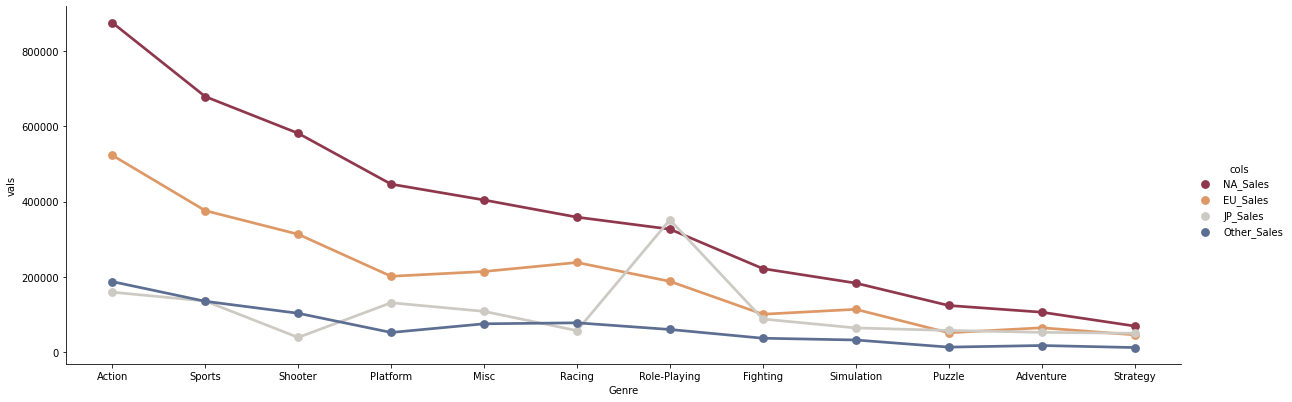

In [220]:
# ÏßÄÏó≠Î≥Ñ - Í≤åÏûÑ Ïû•Î•¥Î≥Ñ Îß§Ï∂ú Ìï©Í≥Ñ Í∑∏ÎûòÌîÑ

df1genresum = df1genresum.sort_values(by='NA_Sales', ascending=False) #Î∂ÅÎØ∏ÏßÄÏó≠ Îß§Ï∂ú ÏàúÏúÑÎ°ú Ï†ïÎ†¨
df1sum = df1genresum.reset_index().melt('Genre', var_name='cols',  value_name='vals')
palette = {"EU_Sales":"#dd9866", "NA_Sales":"#8f384d", "Other_Sales":"#5c6e91", "JP_Sales":"#cdc9c3"}
sns.catplot(x="Genre", y="vals", hue='cols', data=df1sum, height=5.5, aspect=3, kind = 'point', palette=palette);

üëâ Î∂ÅÎØ∏ÏßÄÏó≠ÏùÄ Í∞ÄÏû• Îß§Ï∂úÏù¥ ÎÜíÏùÄ ÏßÄÏó≠Ïù¥Îã§. Î∂ÅÎØ∏ ÏßÄÏó≠Ïùò Îß§Ï∂ú ÏàúÏúÑÎ°ú Îã§Î•∏ ÏßÄÏó≠Îì§Ïùò Îß§Ï∂úÏùÑ Í∑∏Î†§ Î≥¥Î©¥, Î∂ÅÎØ∏ÏôÄ Ïú†ÎüΩ, Îã§Î•∏ ÏßÄÏó≠Ïùò Ïû•Î•¥Î≥Ñ Îß§Ï∂úÏï° Í∑∏ÎûòÌîÑÎäî Ïú†ÏÇ¨Ìïú ÎùºÏù∏ÏùÑ Í∑∏Î¶¨Îäî Í≤ÉÏùÑ Î≥º Ïàò ÏûàÎã§.

üëâ Ïú†ÎüΩÏßÄÏó≠Ïùò Í≤ΩÏö∞ 1-3ÏúÑÎäî Î∂ÅÎØ∏ÏôÄ Í∞ôÏßÄÎßå, Î†àÏù¥Ïã± Í≤åÏûÑÏù¥ ÌîåÎû´Ìèº Í≤åÏûÑÎ≥¥Îã§ Ïù∏Í∏∞ÏûàÎã§Îäî Ï†êÏù¥ Î∂ÅÎØ∏ÏôÄ Îã§Î•¥Îã§. (Í∏∞ÌÉÄÏßÄÏó≠ÏóêÏÑúÎèÑ Î†àÏù¥Ïã± Í≤åÏûÑÏùÄ 4ÏúÑÎã§.)


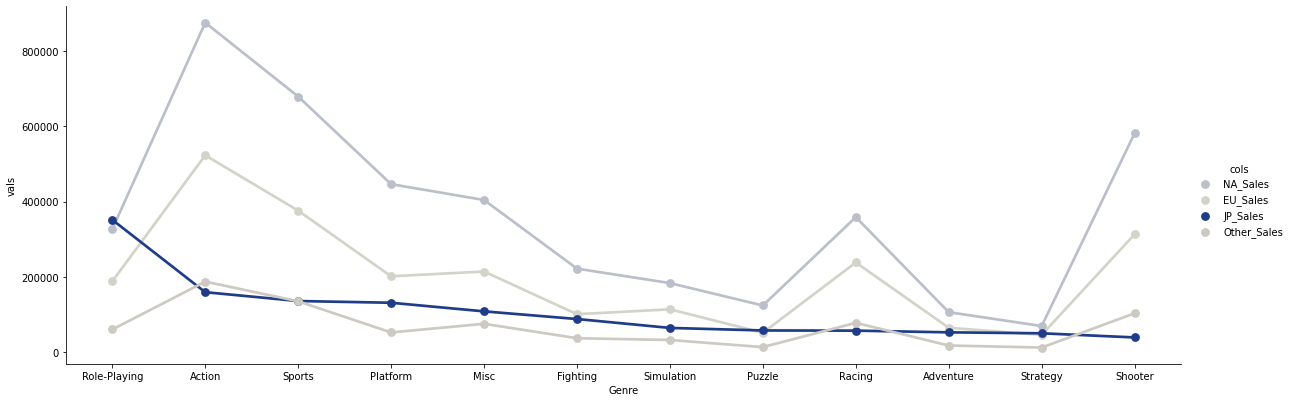

In [180]:
df1genresum = df1genresum.sort_values(by='JP_Sales', ascending=False) #ÏùºÎ≥∏ÏßÄÏó≠ Îß§Ï∂ú ÏàúÏúÑÎ°ú Ï†ïÎ†¨
df1sum = df1genresum.reset_index().melt('Genre', var_name='cols',  value_name='vals')
palette = {"EU_Sales":"#d2d3c9", "NA_Sales":"#bbbfca", "Other_Sales":"#cdc9c3", "JP_Sales":"#1f3c88"}
sns.catplot(x="Genre", y="vals", hue='cols', data=df1sum, height=5.5, aspect=3, kind = 'point', palette=palette);

ÏùºÎ≥∏ ÏßÄÏó≠ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ïû•Î•¥Î≥Ñ Îß§Ï∂úÏùÑ Ïû¨Ï†ïÎ†¨ÌñàÎã§.

In [181]:
rank_by_sales.sort_values(by='JP') # Ïû•Î•¥Î≥Ñ Îß§Ï∂ú ÏàúÏúÑ - ÏùºÎ≥∏ Í∏∞Ï§Ä

NA    JP    EU  Other
Genre                                
Role-Playing   7.0   1.0   7.0    6.0
Action         1.0   2.0   1.0    1.0
Sports         2.0   3.0   2.0    2.0
Platform       4.0   4.0   6.0    7.0
Misc           5.0   5.0   5.0    5.0
Fighting       8.0   6.0   9.0    8.0
Simulation     9.0   7.0   8.0    9.0
Puzzle        10.0   8.0  11.0   11.0
Racing         6.0   9.0   4.0    4.0
Adventure     11.0  10.0  10.0   10.0
Strategy      12.0  11.0  12.0   12.0
Shooter        3.0  12.0   3.0    3.0

üëâ ÏùºÎ≥∏Ïùò Í≤ΩÏö∞ Î∂ÅÎØ∏, Ïú†ÎüΩÍ≥º Îã§Î•¥Í≤å Î°§ÌîåÎ†àÏûâ Í≤åÏûÑÏù¥ Í∞ÄÏû• Ïù∏Í∏∞Í∞Ä ÎßéÎã§. Î∂ÅÎØ∏, Ïú†ÎüΩÏùò Í≤ΩÏö∞ Ïï°ÏÖò Í≤åÏûÑÏù¥ 1ÏúÑÎ°ú Îß§Ï∂úÏù¥ Îã§Î•∏ Ïû•Î•¥Î≥¥Îã§ ÎëêÎìúÎü¨ÏßÄÎßå ÏïïÎèÑÏ†ÅÏù¥ÏßÄÎäî ÏïäÏùÄ Î∞òÎ©¥, ÏùºÎ≥∏Ïùò Î°§ÌîåÎ†àÏûâ Í≤åÏûÑ Îß§Ï∂úÏùÄ 2ÏúÑÏù∏ Ïï°ÏÖò Í≤åÏûÑ Îß§Ï∂úÍ≥º 2Î∞∞ Ïù¥ÏÉÅÏùò Ï∞®Ïù¥Î•º Î≥¥Ïù∏Îã§. 

Ìù•ÎØ∏Î°úÏö¥ Ï†êÏùÄ Î∂ÅÎØ∏, Ïú†ÎüΩÏóêÏÑú Ïù∏Í∏∞ÏûàÎçò ÏÇ¨Í≤©(Shooter) Í≤åÏûÑÏùò Í≤ΩÏö∞ ÏùºÎ≥∏ÏóêÏÑú Í∞ÄÏû• Ïù∏Í∏∞ÏóÜÎäî Ïû•Î•¥Ïóê ÏÜçÌïúÎã§. 

Î†àÏù¥Ïã± Í≤åÏûÑÏùò Í≤ΩÏö∞ Îã§Î•∏ ÏßÄÏó≠ÏóêÏÑúÎäî Îß§Ï∂ú 4-6ÏúÑÏù∏ Î∞òÎ©¥, ÏùºÎ≥∏ÏóêÏÑúÎäî 9ÏúÑÎ°ú Ïù∏Í∏∞ ÏûàÎäî Ìé∏Ïù¥ ÏïÑÎãàÎã§.

Î∞òÎ©¥ ÏùºÎ≥∏ÏùÑ Ï†úÏô∏Ìïú Îã§Î•∏ ÏßÄÏó≠ÏóêÏÑú Í∞ÄÏû• Ïù∏Í∏∞ ÏóÜÎäî Ïû•Î•¥Îäî Ï†ÑÎûµ(Strategy)Ïù¥Îã§.

# ÏßÄÏó≠Î≥Ñ Îß§Ï∂ú Í∑∏ÎûòÌîÑ ÏÉÅÏÑ∏

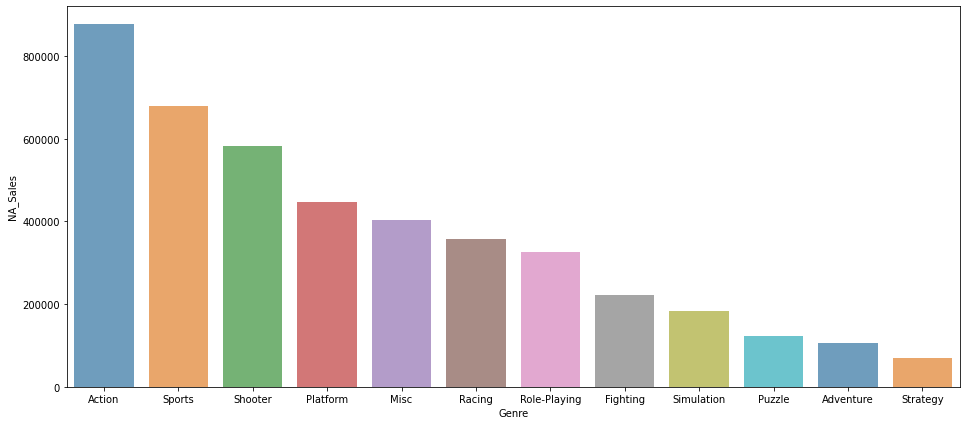

In [182]:
#Î∂ÅÎØ∏ÏßÄÏó≠ Îß§Ï∂ú ÏàúÏúÑÎ°ú Ï†ïÎ†¨

df1genresum = df1genresum.sort_values(by='NA_Sales', ascending=False) 
plt.figure(figsize=(16, 7))
sns.barplot(data=df1genresum.reset_index(), x="Genre", y="NA_Sales", palette="tab10", alpha=.7);

üëâ Î∂ÅÎØ∏ÏßÄÏó≠ÏùÄ Í∞ÄÏû• Îß§Ï∂úÏù¥ ÎÜíÏùÄ ÏßÄÏó≠Ïù¥Îã§. 
Ïï°ÏÖò, Ïä§Ìè¨Ï∏†, ÏÇ¨Í≤©, ÌîåÎû´Ìèº Í≤åÏûÑÏù¥ Í∞ïÏÑ∏Î•º Î≥¥Ïù∏Îã§. 

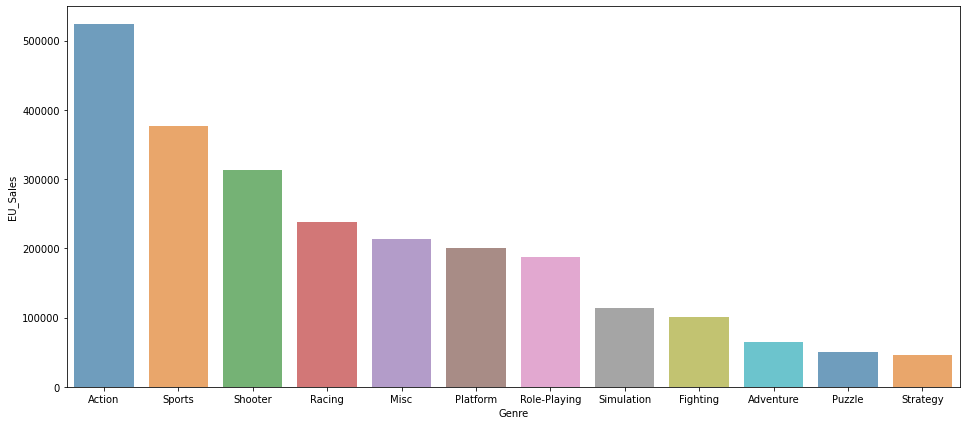

In [183]:
#Ïú†ÎüΩÏßÄÏó≠ Îß§Ï∂ú ÏàúÏúÑÎ°ú Ï†ïÎ†¨

df1genresum = df1genresum.sort_values(by='EU_Sales', ascending=False) 
plt.figure(figsize=(16, 7))
sns.barplot(data=df1genresum.reset_index(), x="Genre", y="EU_Sales", palette="tab10", alpha=.7);

üëâ Ïú†ÎüΩÏßÄÏó≠Ïùò Í≤ΩÏö∞ 1-3ÏúÑÎäî Î∂ÅÎØ∏ÏôÄ Í∞ôÏßÄÎßå, Î†àÏù¥Ïã± Í≤åÏûÑÏù¥ ÌîåÎû´Ìèº Í≤åÏûÑÎ≥¥Îã§ Ïù∏Í∏∞ÏûàÎã§Îäî Ï†êÏù¥ Î∂ÅÎØ∏ÏôÄ Îã§Î•¥Îã§.



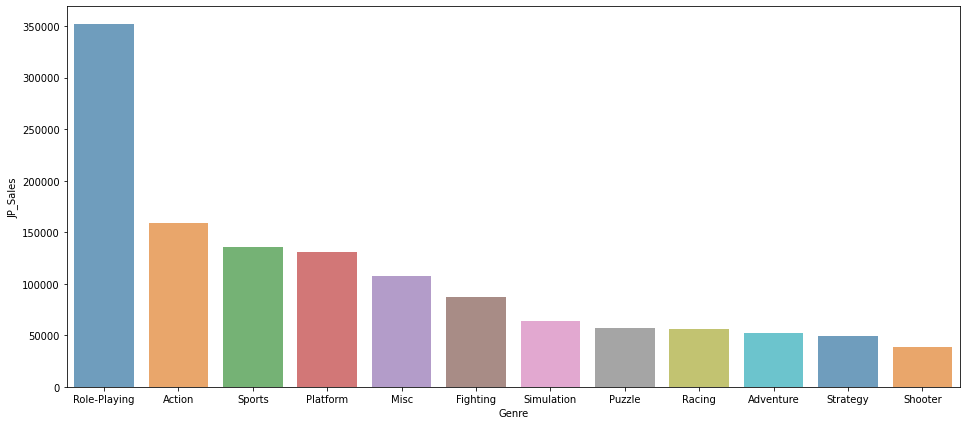

In [184]:
#ÏùºÎ≥∏ Îß§Ï∂ú ÏàúÏúÑÎ°ú Ï†ïÎ†¨

df1genresum = df1genresum.sort_values(by='JP_Sales', ascending=False) 
plt.figure(figsize=(16, 7))
sns.barplot(data=df1genresum.reset_index(), x="Genre", y="JP_Sales", palette="tab10", alpha=.7);

üëâ ÏùºÎ≥∏Ïùò Í≤ΩÏö∞ Î∂ÅÎØ∏, Ïú†ÎüΩÍ≥º Îã§Î•¥Í≤å Î°§ÌîåÎ†àÏûâ Í≤åÏûÑÏù¥ Í∞ÄÏû• Ïù∏Í∏∞Í∞Ä ÎßéÎã§. Î∂ÅÎØ∏, Ïú†ÎüΩÏùò Í≤ΩÏö∞ Ïï°ÏÖò Í≤åÏûÑÏù¥ 1ÏúÑÎ°ú Îß§Ï∂úÏù¥ Îã§Î•∏ Ïû•Î•¥Î≥¥Îã§ ÎëêÎìúÎü¨ÏßÄÎßå ÏïïÎèÑÏ†ÅÏù¥ÏßÄÎäî ÏïäÏùÄ Î∞òÎ©¥, ÏùºÎ≥∏Ïùò Î°§ÌîåÎ†àÏûâ Í≤åÏûÑ Îß§Ï∂úÏùÄ 2ÏúÑÏù∏ Ïï°ÏÖò Í≤åÏûÑ Îß§Ï∂úÍ≥º 2Î∞∞ Ïù¥ÏÉÅÏùò Ï∞®Ïù¥Î•º Î≥¥Ïù∏Îã§. 

Ìù•ÎØ∏Î°úÏö¥ Ï†êÏùÄ Î∂ÅÎØ∏, Ïú†ÎüΩÏóêÏÑú Ïù∏Í∏∞ÏûàÎçò ÏÇ¨Í≤©(Shooter) Í≤åÏûÑÏùò Í≤ΩÏö∞ ÏùºÎ≥∏ÏóêÏÑú Í∞ÄÏû• Ïù∏Í∏∞ÏóÜÎäî Ïû•Î•¥Ïóê ÏÜçÌïúÎã§.

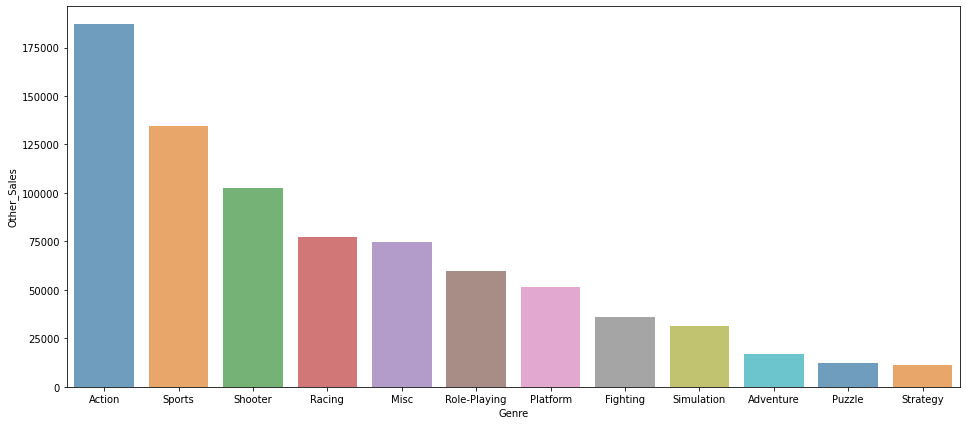

In [185]:
#Í∏∞ÌÉÄÏßÄÏó≠ Îß§Ï∂ú ÏàúÏúÑÎ°ú Ï†ïÎ†¨

df1genresum = df1genresum.sort_values(by='Other_Sales', ascending=False) 
plt.figure(figsize=(16, 7))
sns.barplot(data=df1genresum.reset_index(), x="Genre", y="Other_Sales", palette="tab10", alpha=.7);

# Ïó∞ÎèÑÎ≥Ñ Í≤åÏûÑÏùò Ìä∏Î†åÎìúÍ∞Ä ÏûàÏùÑÍπå?

In [186]:
# Ï¥ùÎß§Ï∂ú ÏàúÏúÑÎ≥ÑÎ°ú Ï†ïÎ†¨Ìïú df ÎßåÎì§Í∏∞

df2 = df.sort_values(by='Sales_Sum', ascending=False)[['Name',	'Platform',	'Year',	'Genre',	'Publisher', 'Sales_Sum']].reset_index()
del df2['index']
df2

Name  ... Sales_Sum
0                                            Wii Sports  ...   82740.0
1                                     Super Mario Bros.  ...   40240.0
2                                        Mario Kart Wii  ...   35830.0
3                                     Wii Sports Resort  ...   33000.0
4                              Pokemon Red/Pokemon Blue  ...   31380.0
...                                                 ...  ...       ...
16491                             Ouka Sengoku Portable  ...      10.0
16492                                   Palais de Reine  ...      10.0
16493                            DoDonPachi Saidaioujou  ...      10.0
16494                    Fate/kaleid liner Prisma Illya  ...      10.0
16495  SCORE International Baja 1000: The Official Game  ...       0.0

[16496 rows x 6 columns]

In [ ]:
yearcount = df2.groupby(by="Year").Name.count() #Ïó∞ÎèÑÎ≥Ñ Ï∂úÏãúÎêú Í≤åÏûÑ Ïà´Ïûê

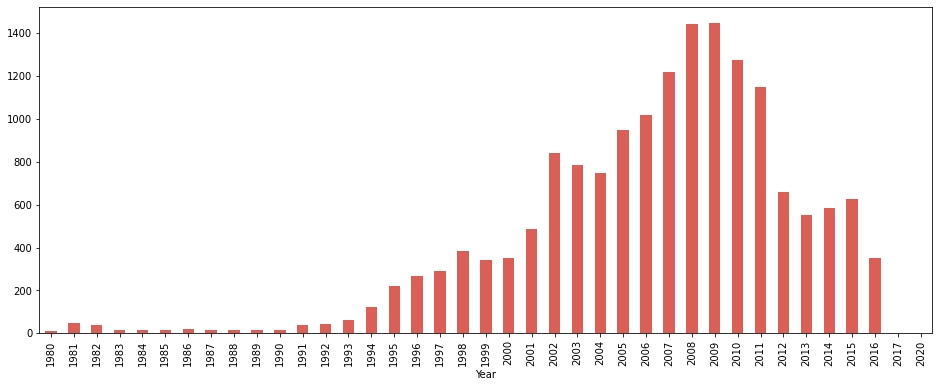

In [188]:
yearcount.plot(kind='bar', figsize=(16, 6));

94ÎÖÑÎèÑÎ∂ÄÌÑ∞ Ìïú Ìï¥ Ï∂úÏãúÎêòÎäî Í≤åÏûÑÏùÄ 100Í∞úÍ∞Ä ÎÑòÏñ¥, 2008-2009ÎÖÑÏóêÎäî Ï∂úÏãúÎêú Í≤åÏûÑÏùò ÏàòÍ∞Ä Í∞ÄÏû• ÎßéÏïòÎã§. 2009ÎÖÑ Ïù¥ÌõÑÎ∂ÄÌÑ∞Îäî ÌïòÎùΩÏÑ∏Î•º Î≥¥Ïù∏Îã§.

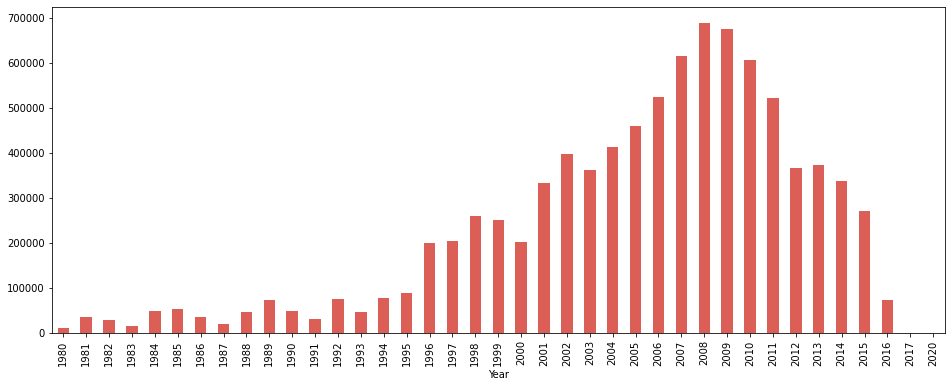

In [189]:
#Ïó∞ÎèÑÎ≥Ñ Í≤åÏûÑ ÏÇ∞ÏóÖ Îß§Ï∂ú Ï¥ùÏï°(Î™®Îì† ÏßÄÏó≠)

yearsales = df2.groupby(by="Year").Sales_Sum.sum()
yearsales.plot(kind='bar', figsize=(16, 6));

Ïó∞ÎèÑÎ≥Ñ Í≤åÏûÑÏùò ÌåêÎß§ Ï¥ùÏï° Í∑∏ÎûòÌîÑÎã§. Ïó≠Ïãú 2008-2009ÎÖÑÏù¥ Îß§Ï∂úÏù¥ Í∞ÄÏû• ÎÜíÏïÑ, Í≤åÏûÑÏùò Ï†ÑÏÑ±Í∏∞ÏòÄÎã§Îäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§. 2008ÎÖÑ Ïù¥ÌõÑ ÌïòÎùΩÏÑ∏Î•º Î≥¥Ïù∏Îã§. 

Ïó∞ÎèÑÎ≥Ñ Ï∂úÏãú Í≤åÏûÑ ÏàòÎäî 1991ÎÖÑ Ïù¥ÌõÑ Ï¶ùÍ∞ÄÌñàÎäîÎç∞, Í∑∏ Ï†ÑÍπåÏßÄ Í≤åÏûÑÏùò Îß§Ï∂úÏùÄ Îì§Ï≠âÎÇ†Ï≠âÌñàÏßÄÎßå Ïñ¥ÎäêÏ†ïÎèÑ ÏàòÏöîÍ∞Ä ÏûàÏóàÎã§. 1991ÎÖÑ Ïù¥ÌõÑ,  Î∞úÎß§ÎêòÎäî Í≤åÏûÑ Ïàò Ï¶ùÍ∞ÄÏôÄ ÎçîÎ∂àÏñ¥ Îß§Ï∂ú Ïó≠Ïãú ÎπÑÏä∑Ìïú Í∑∏ÎûòÌîÑÎ•º Í∑∏Î¶¨Î©∞ ÎäòÏóàÎã§.

Ìù•ÎØ∏Î°úÏö¥ Ï†êÏùÄ 2013-2015ÎÖÑÏóê Ïó∞ÎèÑÎ≥Ñ Ï∂úÏãúÎêòÎäî Í≤åÏûÑÏùò ÏàòÎäî ÎäòÏóàÏßÄÎßå, Í≤åÏûÑÏùò Îß§Ï∂úÏùÄ Í≥ÑÏÜç ÌïòÎùΩÌñàÎã§Îäî Í≤ÉÏù¥Îã§. 

## Ïó∞ÎèÑÎ≥Ñ Î∞úÎß§Îêú Í≤åÏûÑ Ïû•Î•¥ Ïàò Í≥ÑÏÇ∞

In [190]:
#Ïó∞ÎèÑÎ≥Ñ Î∞úÎß§Îêú Í≤åÏûÑ Ïû•Î•¥ Ïà´Ïûê Í≥ÑÏÇ∞
yeargenre  = df2.groupby(by=["Year", "Genre"]).count().reset_index()
yeargenre = yeargenre.iloc[:,0:3].rename(columns={'Name': 'Count'})
yeargenre

Year         Genre  Count
0    1980        Action      2
1    1980      Fighting      1
2    1980          Misc      4
3    1980       Shooter      2
4    1981        Action     25
..    ...           ...    ...
383  2016        Sports     38
384  2016      Strategy     10
385  2017        Action      1
386  2017  Role-Playing      2
387  2020    Simulation      1

[388 rows x 3 columns]

In [191]:
#Ïó∞ÎèÑÏàúÏúºÎ°ú ÎÇòÎà†Ï§å
early = df2[df2['Year'] <1995]
mid = df2[(1995<= df2['Year']) & (df2['Year']<2010)]
late = df2[df2['Year'] >=2010]

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


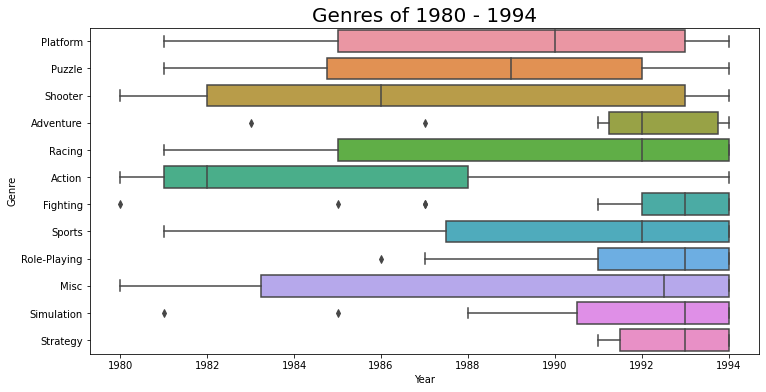

In [192]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = early.reset_index(), x='Year', y='Genre');
plt.title('Genres of 1980 - 1994', fontsize = 20);

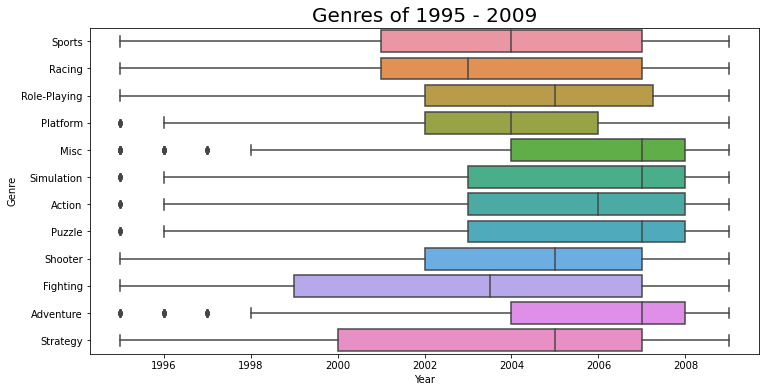

In [193]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = mid.reset_index(), x='Year', y='Genre');
plt.title('Genres of 1995 - 2009', fontsize = 20);

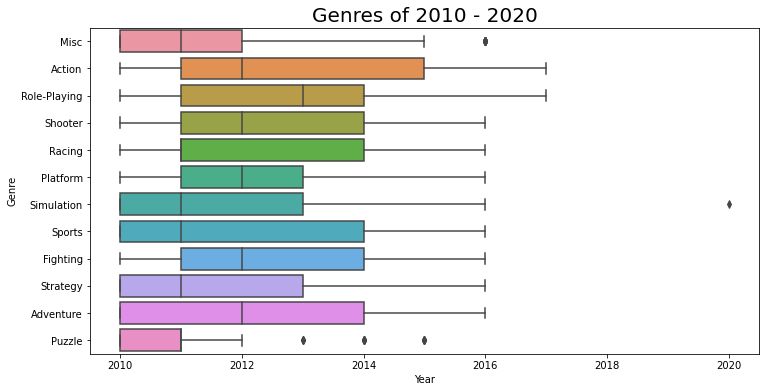

In [194]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = late.reset_index(), x='Year', y='Genre');
plt.title('Genres of 2010 - 2020', fontsize = 20);

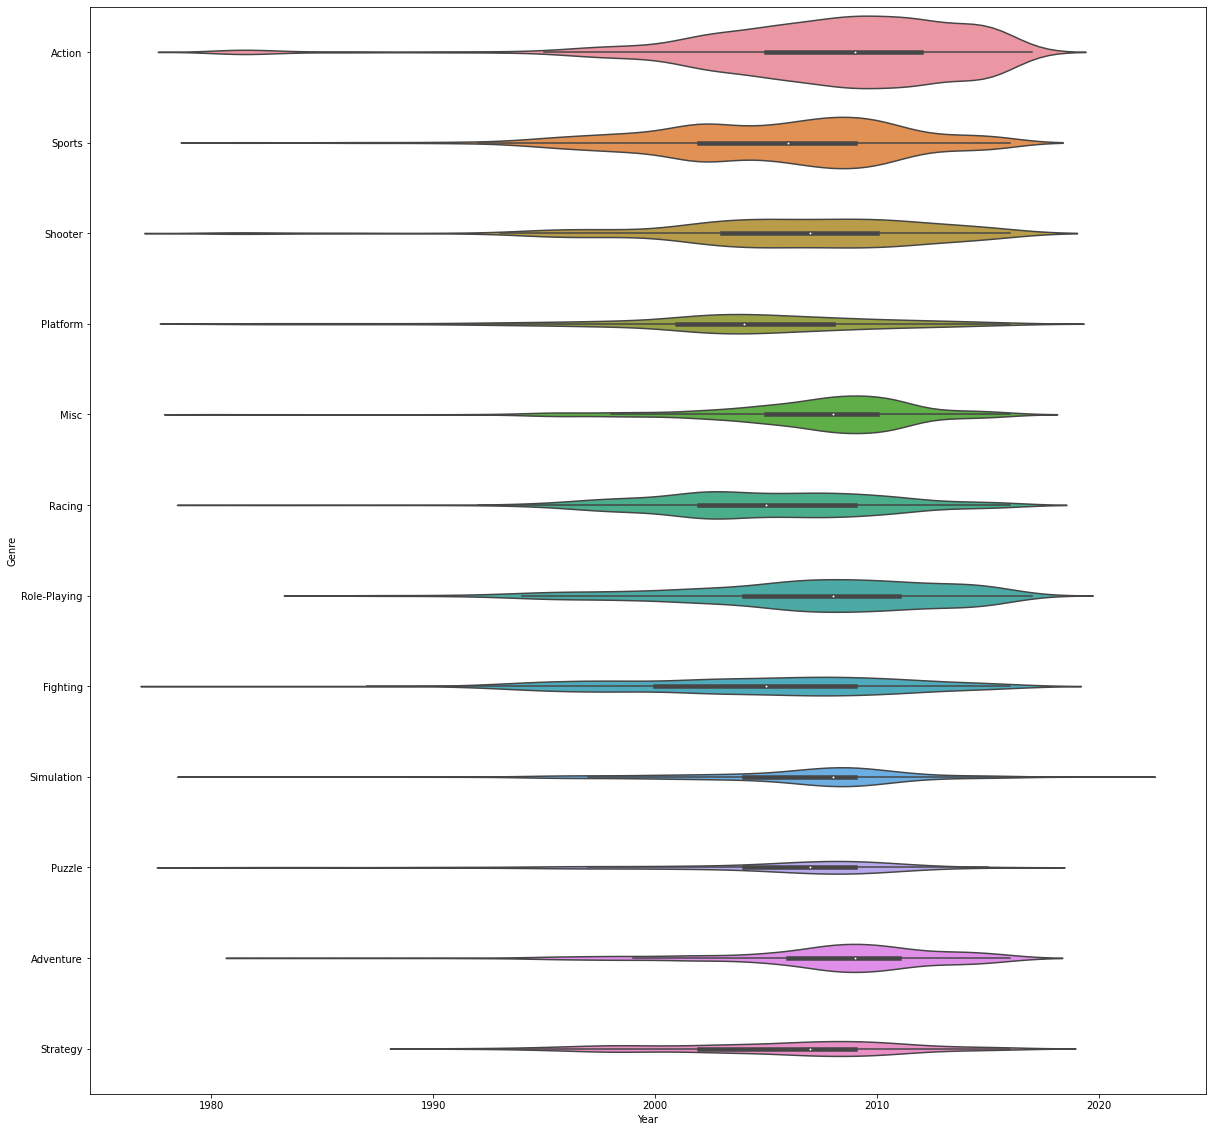

In [195]:
plt.figure(figsize=(20, 20))
sns.violinplot(data = df2, x='Year', y='Genre', scale="count",
               order=[ "Action", "Sports", "Shooter", "Platform", "Misc", "Racing", "Role-Playing", "Fighting", "Simulation", "Puzzle", "Adventure", 'Strategy']); # Ïπ¥Ïö¥Ìä∏Î°ú Î∞úÎß§Îêú ÏàòÎ°ú ÎÑìÏù¥ Ï°∞Ï†à

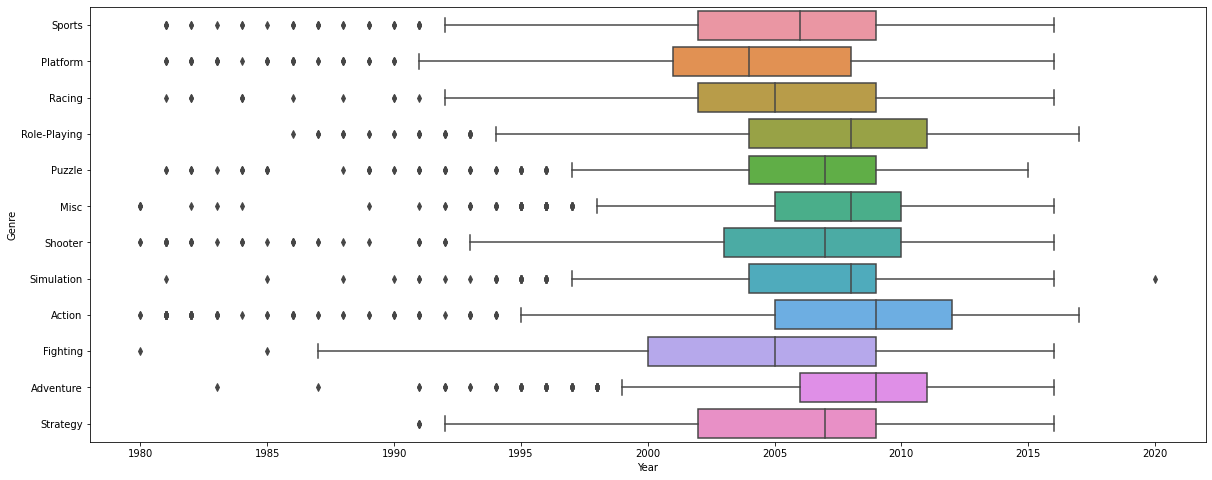

In [196]:
plt.figure(figsize=(20, 8))
sns.boxplot(data = df2, x='Year', y='Genre');

Îß§Ï∂úÏùò ÏïÑÏõÉÎùºÏù¥Ïñ¥Îì§ÏùÄ ÎåÄÎ∞ïÍ≤åÏûÑÏù¥Îã§. 
Ïï°ÏÖòÍ≥º Î°§ÌîåÎ†àÏûâÏùò Í≤ΩÏö∞ ÌûàÌä∏Í∞Ä ÎÇú Îã§Ïùå Í≤åÏûÑ ÏÉùÏÇ∞Ïù¥ ÎäòÏóàÎã§.

## Ïó∞ÎèÑÎ≥Ñ Î∞úÎß§Îêú Í≤åÏûÑÏùò Ï¥ù Îß§Ï∂ú Í∑∏ÎûòÌîÑ

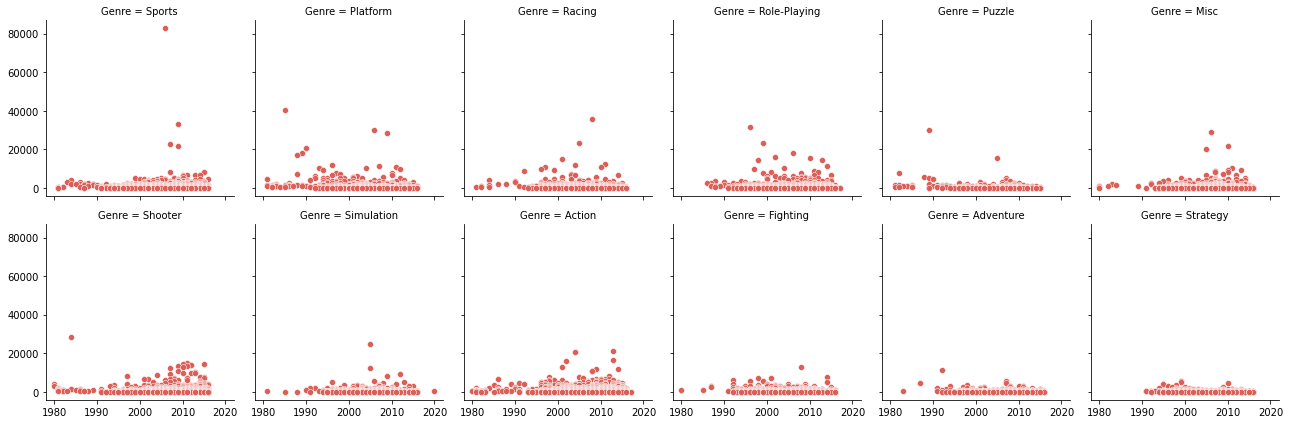

In [ ]:
# Ïû•Î•¥Î≥Ñ Ïó∞ÎèÑÎ≥Ñ Ï¥ùÎß§Ï∂ú
g = sns.FacetGrid(data=df2, col='Genre', col_wrap=6)

g.map_dataframe(
    sns.scatterplot,
    x='Year',  y='Sales_Sum',
    data = large_df
)
g.add_legend();

###Îß§Ï∂ú ÌÉë 100ÏúÑ Í≤åÏûÑÏùò Ïó∞ÎèÑÎ≥Ñ Î∂ÑÌè¨ (Î∫ÑÍπå?)

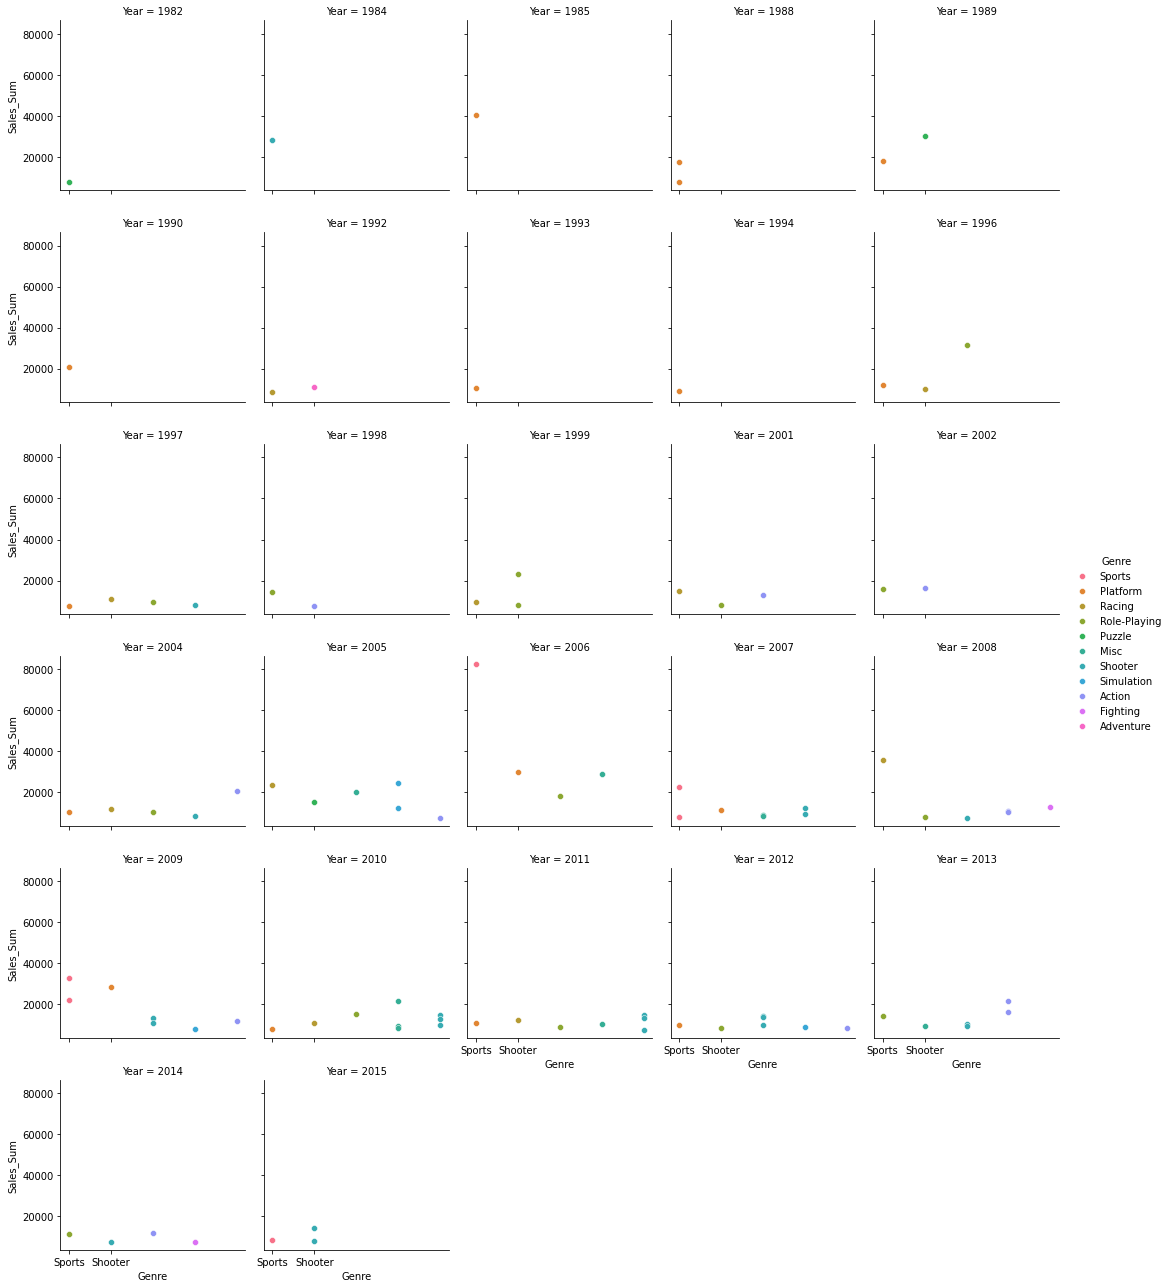

In [197]:
# Îß§Ï∂ú ÌÉë 100ÏúÑ Í≤åÏûÑÏùò Ïó∞ÎèÑÎ≥Ñ Î∂ÑÌè¨

color = sns.color_palette("hls")
sns.set_palette(color)

fa = sns.FacetGrid(df.sort_values(by=["Sales_Sum"], ascending=False).head(100), col="Year", col_wrap=5, hue='Genre'); #hueÎäî ÏßÄÏó≠ÏúºÎ°ú ÎÑ£ÏùÑ Ïàò ÏûàÏùÑ Í≤É Í∞ôÏùÄÎç∞...
fa.map(sns.scatterplot, "Genre", "Sales_Sum")

fa.add_legend()

Ï†ÑÏÑ±Í∏∞Ïù∏ 2009-2013ÎÖÑÏóê Ïó≠ÎåÄ Îß§Ï∂ú ÌÉë 100ÏúÑ ÏïàÏóê ÎìúÎäî Í≤åÏûÑÏù¥ Îçî ÎπàÎ≤àÌïòÍ≤å ÎÇòÏôîÎã§.

2016ÎÖÑ Ïù¥ÌõÑÏóêÎäî Îß§Ï∂ú ÌÉë 100ÏúÑ ÏïàÏóê ÎìúÎäî Í≤åÏûÑÏù¥ ÏóÜÎã§.(Îç∞Ïù¥ÌÑ∞ ÏÖã ÏÉÅ)


### Ïó∞ÎèÑÎ≥Ñ ÌîåÎû´Ìèº Îß§Ï∂ú ÎπÑÍµê

In [198]:
df.groupby(by=["Year",'Platform']).count()

Name  Genre  Publisher  ...  Other_Sales  Sales_Sum  Sales_Mean
Year Platform                          ...                                    
1980 2600         8      8          8  ...            8          8           8
     X360         1      1          1  ...            1          1           1
1981 2600        46     46         46  ...           46         46          46
1982 2600        36     36         36  ...           36         36          36
     PS2          1      1          1  ...            1          1           1
...             ...    ...        ...  ...          ...        ...         ...
2016 X360         8      8          8  ...            8          8           8
     XOne        54     54         54  ...           54         54          54
2017 PS4          1      1          1  ...            1          1           1
     PSV          2      2          2  ...            2          2           2
2020 DS           1      1          1  ...            1          1           1

[328 rows x 9 columns]

In [199]:
large_df = df[df['Platform'].str.contains('PS2|DS|PS3|Wii|X360|PSP|PS|PC|XB|GBA|GC|3DS|PSV|PS4')] #300Í∞ú Ïù¥Ìïò ÌîåÎû´Ìèº Ï†úÏô∏
large_df

Name  ... Sales_Mean
0                        Candace Kane's Candy Factory  ...       10.0
1                                      The Munchables  ...       45.0
2      Otome wa Oanesama Boku ni Koi Shiteru Portable  ...        5.0
3                    Deal or No Deal: Special Edition  ...       10.0
4           Ben 10 Ultimate Alien: Cosmic Destruction  ...       62.5
...                                               ...  ...        ...
16491                         Ice Age 2: The Meltdown  ...       50.0
16492                     Rainbow Islands: Revolution  ...        2.5
16493                                        NBA 2K16  ...      197.5
16494                     Toukiden: The Age of Demons  ...       95.0
16495                        The King of Fighters '95  ...       42.5

[15119 rows x 11 columns]

In [200]:
large_df = large_df[large_df['Platform'] !='PCFX']

In [201]:
large_df.groupby(by=['Platform']).count().sort_values(by="Name", ascending=False).T

Platform      PS2    DS   PS3   Wii  X360   PSP  ...  GBA   GC  3DS  PSV  PS4  WiiU
Name         2155  2152  1321  1319  1258  1207  ...  794  555  507  410  336   143
Year         2155  2152  1321  1319  1258  1207  ...  794  555  507  410  336   143
Genre        2155  2152  1321  1319  1258  1207  ...  794  555  507  410  336   143
Publisher    2155  2152  1321  1319  1258  1207  ...  794  555  507  410  336   143
NA_Sales     2155  2152  1321  1319  1258  1207  ...  794  555  507  410  336   143
EU_Sales     2155  2152  1321  1319  1258  1207  ...  794  555  507  410  336   143
JP_Sales     2155  2152  1321  1319  1258  1207  ...  794  555  507  410  336   143
Other_Sales  2155  2152  1321  1319  1258  1207  ...  794  555  507  410  336   143
Sales_Sum    2155  2152  1321  1319  1258  1207  ...  794  555  507  410  336   143
Sales_Mean   2155  2152  1321  1319  1258  1207  ...  794  555  507  410  336   143

[10 rows x 15 columns]

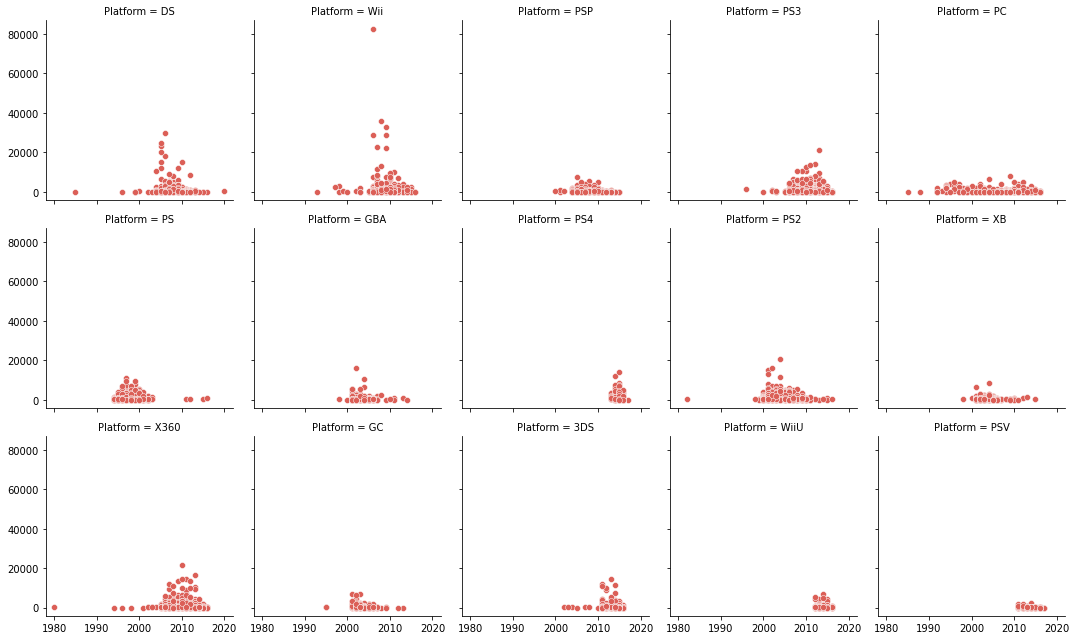

In [203]:
# ÌîåÎû´ÌèºÎ≥Ñ Ïó∞ÎèÑÎ≥Ñ Ï¥ùÎß§Ï∂ú
g = sns.FacetGrid(data=large_df, col='Platform', col_wrap=5)

g.map_dataframe(
    sns.scatterplot,
    x='Year',  y='Sales_Sum',
    data = large_df
)
g.add_legend();

WiiÏóêÏÑú Îß§Ï∂ú 1ÏúÑ Í≤åÏûÑÏù¥ ÎÇòÏôîÎã§. DSÎèÑ ÌûàÌä∏Ìïú Í≤åÏûÑÏùÑ Ïñ¥ÎäêÏ†ïÎèÑ ÎÉàÎã§.

GC, 3DSÎäî 2000ÎÖÑ Ïù¥ÌõÑ, 

WiiU, PS5Îäî 2010ÎÖÑ Ïù¥ÌõÑ Ï∂úÏãúÎêú ÌîåÎû´ÌèºÏù¥Îã§.

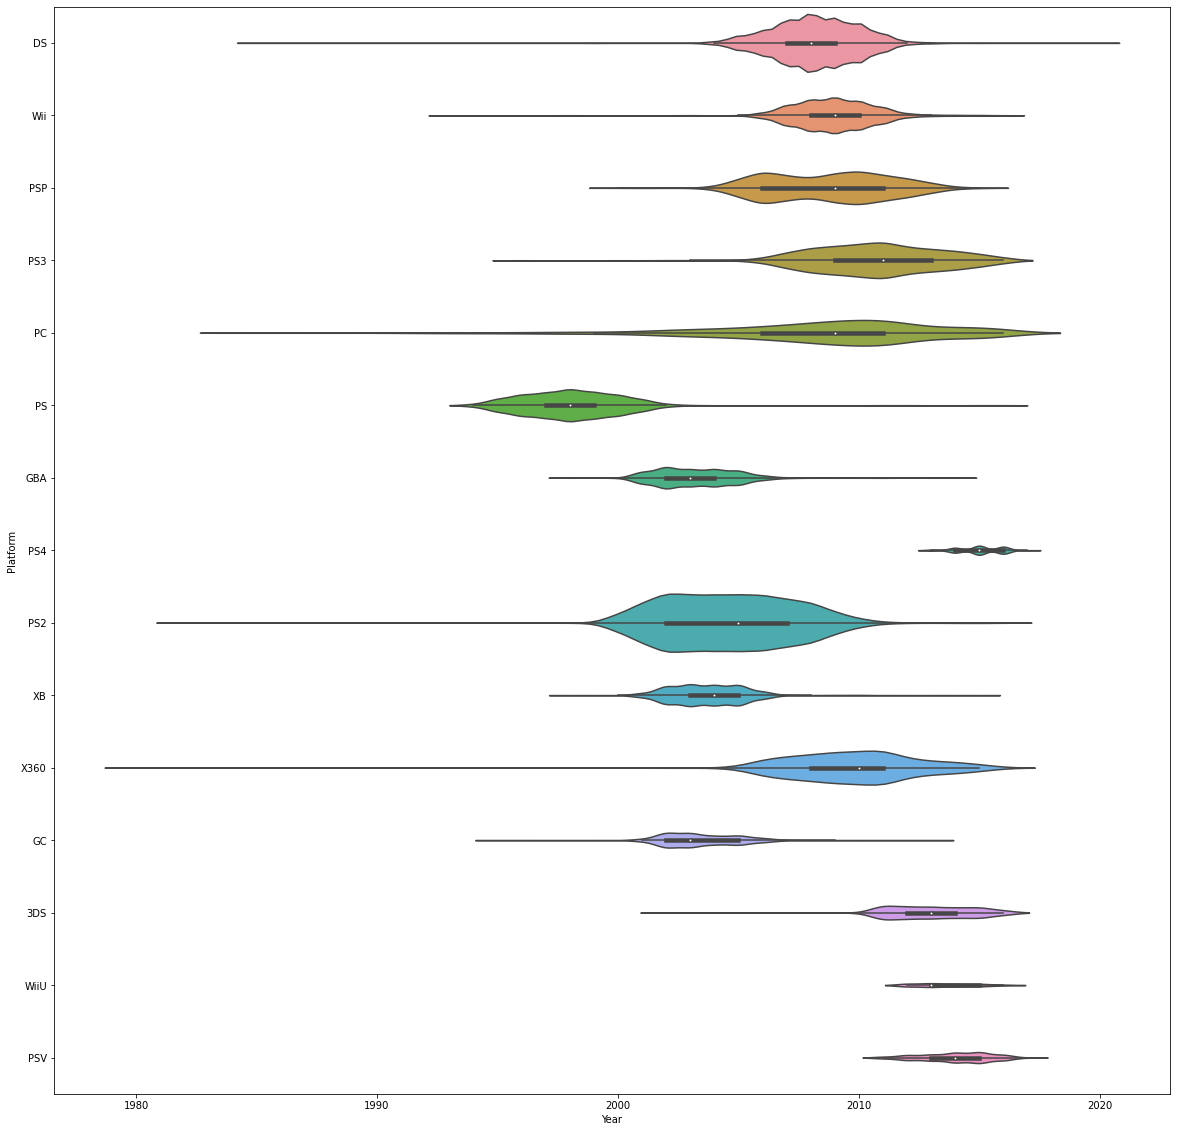

In [204]:
plt.figure(figsize=(20, 20))
sns.violinplot(data = large_df, x='Year', y='Platform', scale="count");

ÌîåÎû´ÌèºÎ≥ÑÎ°ú Î∞úÎß§Îêú Í≤åÏûÑÏùò Ïà´ÏûêÏùò Ïó∞ÎèÑÎ≥Ñ Î∞îÏù¥Ïò¨Î¶∞ÌîåÎ°ØÏù¥Îã§.

Í≤åÏûÑÏùò Ïà´ÏûêÎùº Îß§Ï∂úÍ≥º ÎπÑÎ°ÄÌïòÏßÄÎäî ÏïäÎäîÎã§.

# Îß§Ï∂úÏù¥ ÎÜíÏùÄ Í≤åÏûÑÏóê ÎåÄÌïú Î∂ÑÏÑù Î∞è ÏãúÍ∞ÅÌôî ÌîÑÎ°úÏÑ∏Ïä§

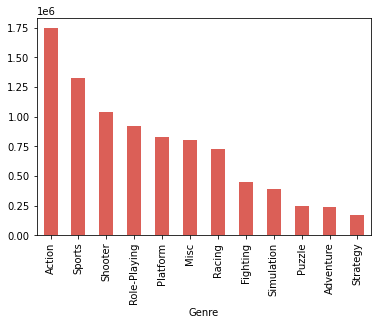

In [205]:
genre_sales_sum = df.groupby(by=["Genre"]).Sales_Sum.sum().sort_values(ascending=False) #Ïû•Î•¥Î≥Ñ Îß§Ï∂ú Ï¥ùÏï°
genre_sales_sum.plot(kind='bar'); #Îã®ÏúÑ : B

Î®ºÏ†Ä Ïû•Î•¥Î≥ÑÎ°ú Îß§Ï∂ú Ï¥ùÏï°ÏùÑ ÎπÑÍµê.

yÏ∂ïÏùò Îã®ÏúÑÎäî BÏù¥Îã§. Ïï°ÏÖò Í≤åÏûÑ>Ïä§Ìè¨Ï∏†>ÏäàÌÑ∞>Î°§ÌîåÎ†àÏûâ ÏàúÏúºÎ°ú Îß§Ï∂úÏù¥ ÎÜíÏïòÎäîÎç∞,
Î°§ÌîåÎ†àÏûâÏùò Í≤ΩÏö∞ ÏùºÎ≥∏ÏùÑ ÌÉÄÍπÉÏúºÎ°ú Ìï¥Ïïº ÌïòÍ≥†, Ïï°ÏÖòÏùÄ ÏµúÍ∑ºÏóêÎèÑ Îß§Ï∂úÏù¥ ÎÜíÏïòÎã§. 

Îî∞ÎùºÏÑú Ïï°ÏÖò Ïû•Î•¥Î•º ÎßåÎì§Ïñ¥Ïïº ÌïúÎã§.

In [206]:
genre_sales_sum

Genre
Action          1745540.0
Sports          1325460.0
Shooter         1035860.0
Role-Playing     925270.0
Platform         829730.0
Misc             800450.0
Racing           730060.0
Fighting         445190.0
Simulation       391250.0
Puzzle           243460.0
Adventure        238210.0
Strategy         174550.0
Name: Sales_Sum, dtype: float64

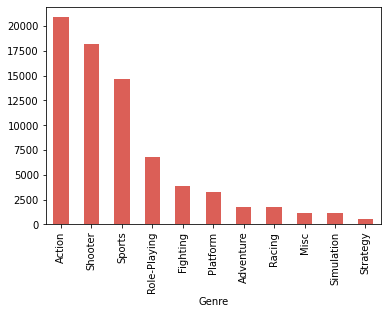

In [207]:
# ÏµúÍ∑º 5ÎÖÑÍ∞ÑÏùò Ïû•Î•¥Î≥Ñ Îß§Ï∂ú
df2[df2['Year'] >=2016].groupby(by=["Genre"]).Sales_Sum.sum().sort_values(ascending=False).head(15).plot(kind='bar');

ÏµúÍ∑º 5ÎÖÑÍ∞Ñ Ïû•Î•¥Î≥Ñ Îß§Ï∂úÏùÑ Î¥êÎèÑ Ïï°ÏÖòÏù¥ Ïö∞ÏÑ∏ÌïòÎã§. ÏöîÏÉàÎäî Ïä§Ìè¨Ï∏†Î≥¥Îã§ ÏÇ¨Í≤© Í≤åÏûÑÏù¥ Ïûò ÌåîÎ¶∞Îã§.
Ïû•Î•¥Îäî Ïï°ÏÖò / ÏÇ¨Í≤©Ïù¥ Ï¢ãÍ≤†Îã§.

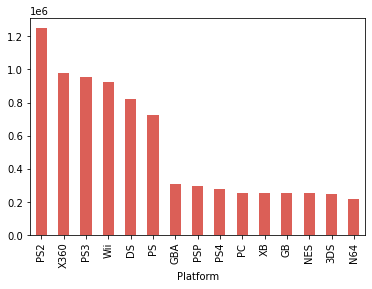

In [208]:
# Í∞ÄÏû• Îß§Ï∂ú Ï¥ùÏï°Ïù¥ ÎÜíÏùÄ ÌîåÎû´Ìèº ÌÉë 15
df.groupby(by=["Platform"]).Sales_Sum.sum().sort_values(ascending=False).head(15).plot(kind='bar');

ÏùòÏô∏Î°ú PC Í≤åÏûÑÏùò Îß§Ï∂úÏù¥ ÎÜíÏßÄ ÏïäÎã§.
PS2Ïùò Îß§Ï∂úÏùÄ Ïó≠ÎåÄ ÏµúÎåÄÏßÄÎßå, 2012ÎÖÑ Îã®Ï¢ÖÎêòÏóàÎã§. Í≤åÏûÑ ÏãúÏû•Ïùò Ï†ÑÏÑ±Í∏∞Ïù∏ 2008-2009ÎÖÑÏùò ÏàòÌòúÎ•º ÏûÖÏñ¥, Îã§Î•∏ ÌîåÎû´ÌèºÎì§Ïù¥ PS2Ïùò Îß§Ï∂úÏùÑ ÎÑòÏßÄ Î™ªÌñàÎã§. 

ÏóëÏä§Î∞ïÏä§360ÎèÑ Îã®Ï¢ÖÎêòÏóàÎã§.

ÌòÑÏû¨ÏóêÎèÑ Îã®Ï¢ÖÎêòÏßÄ ÏïäÍ≥† Í≤åÏûÑÏù¥ Ïûò ÌåîÎ¶¨Îäî ÌîåÎû´ÌèºÏùÑ ÌÉÄÍπÉÏúºÎ°ú Ìï¥Ïïº ÌïúÎã§. 

ÌïòÏßÄÎßå ÎåÄÎ∂ÄÎ∂Ñ Îã®Ï¢ÖÎêòÏñ¥ÏÑú ÏµúÍ∑º Îß§Ï∂úÏùÑ Î≥º ÌïÑÏöîÍ∞Ä ÏûàÏùå

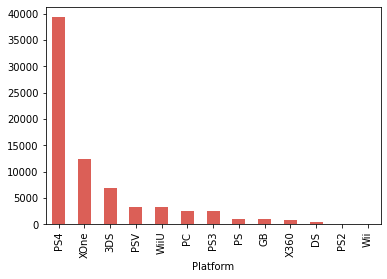

In [209]:
#ÏµúÍ∑º 5ÎÖÑ Í∏∞Ï§Ä Îß§Ï∂ú Ï¥ùÏï°Ïù¥ ÎÜíÏùÄ ÌîåÎû´Ìèº ÌÉë
df2[df2['Year'] >=2016].groupby(by=["Platform"]).Sales_Sum.sum().sort_values(ascending=False).head(15).plot(kind='bar');

2017ÎÖÑ Ïù¥ÌõÑ ÏûêÎ£åÍ∞Ä Í±∞Ïùò ÏóÜÎã§. ÏµúÍ∑º ÏûêÎ£å ÌïÑÏöî

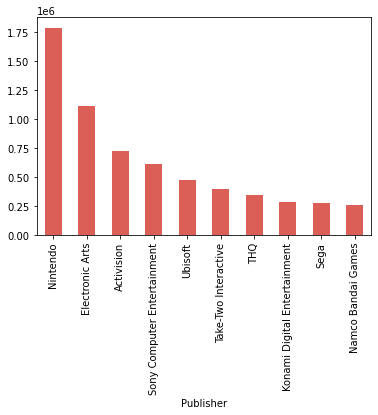

In [210]:
# ÌçºÎ∏îÎ¶¨ÏÖî Îß§Ï∂ú Ï¥ùÏï° top 10
df.groupby(by=["Publisher"]).Sales_Sum.sum().sort_values(ascending=False).head(10).plot(kind='bar');

Í∞ìÌÖêÎèÑ... Í∞ìÌÖêÎèÑÏôÄ ÏÜêÏû°Ïûê.

ÎãåÌÖêÎèÑ Ïä§ÏúÑÏπò, 3DS

ÏµúÍ∑º Ï∂úÏãúÌïú PS5ÎèÑ Í¥úÏ∞ÆÍ≤†Îã§.

In [211]:
df.sort_values(by=["Sales_Sum"], ascending=False).head(25) #Îß§Ï∂ú ÌÉë 25ÏúÑ

Name  ... Sales_Mean
2895                                     Wii Sports  ...    20685.0
4173                              Super Mario Bros.  ...    10060.0
12504                                Mario Kart Wii  ...     8957.5
3337                              Wii Sports Resort  ...     8250.0
7784                       Pokemon Red/Pokemon Blue  ...     7845.0
1200                                         Tetris  ...     7565.0
6897                          New Super Mario Bros.  ...     7502.5
3000                                       Wii Play  ...     7252.5
16430                     New Super Mario Bros. Wii  ...     7152.5
10431                                     Duck Hunt  ...     7077.5
11076                                    Nintendogs  ...     6187.5
10592                                 Mario Kart DS  ...     5857.5
9364                    Pokemon Gold/Pokemon Silver  ...     5772.5
3417                                        Wii Fit  ...     5680.0
10840                                  Wii Fit Plus  ...     5500.0
4316                             Kinect Adventures!  ...     5455.0
3464                             Grand Theft Auto V  ...     5347.5
14581                 Grand Theft Auto: San Andreas  ...     5202.5
13033                             Super Mario World  ...     5155.0
13149  Brain Age: Train Your Brain in Minutes a Day  ...     5055.0
10497                 Pokemon Diamond/Pokemon Pearl  ...     4587.5
9439                               Super Mario Land  ...     4535.0
14767                           Super Mario Bros. 3  ...     4320.0
10854                            Grand Theft Auto V  ...     4095.0
5307                    Grand Theft Auto: Vice City  ...     4037.5

[25 rows x 11 columns]

In [212]:
top100 = df.sort_values(by=["Sales_Sum"], ascending=False).head(100)  # Îß§Ï∂ú ÌÉë 100ÏúÑ Ï†ïÎ†¨
top100

Name Platform  ...  Sales_Sum Sales_Mean
2895                               Wii Sports      Wii  ...    82740.0    20685.0
4173                        Super Mario Bros.      NES  ...    40240.0    10060.0
12504                          Mario Kart Wii      Wii  ...    35830.0     8957.5
3337                        Wii Sports Resort      Wii  ...    33000.0     8250.0
7784                 Pokemon Red/Pokemon Blue       GB  ...    31380.0     7845.0
...                                       ...      ...  ...        ...        ...
1095   Crash Bandicoot 2: Cortex Strikes Back       PS  ...     7570.0     1892.5
7451                      Super Mario Bros. 2      NES  ...     7460.0     1865.0
12775     Super Smash Bros. for Wii U and 3DS      3DS  ...     7440.0     1860.0
10878              Call of Duty: World at War     X360  ...     7380.0     1845.0
7964                            Battlefield 3     X360  ...     7340.0     1835.0

[100 rows x 11 columns]

In [213]:
# Too100 Í≤åÏûÑ Ï†úÎ™© Ï§ë Í∞ÄÏû• ÏûêÏ£º ÎÇòÏò§Îäî Îã®Ïñ¥ Íµ¨ÌïòÍ∏∞
import re
wordcount = {}
for words in top100['Name']:
  wordList = re.split(' |:',words)
  for w in wordList:
    wordcount[w] = wordcount.get(w, 0) + 1  # Get Î™ÖÎ†πÏñ¥Î•º ÌÜµÌï¥, DictionaryÏóê KeyÍ∞Ä ÏóÜÏúºÎ©¥ 0Î¶¨ÌÑ¥
    keys = sorted(wordcount.keys())

word_df = pd.DataFrame.from_dict(wordcount, orient='index')
word_df = word_df.rename(columns ={0:'Count'})
word_df.sort_values(by='Count', ascending=False).iloc[1:].head(20)

Count
Mario       23
Super       18
of          16
Duty        14
Call        14
2           12
Pokemon     10
3            9
Auto         9
Theft        9
Grand        9
Wii          9
Bros.        8
Black        6
Warfare      6
Kart         5
Gran         5
Modern       5
Ops          5
Turismo      5

Îß§Ï∂úÏàúÏúÑ ÌÉë 100 ÏïàÏóê ÎìúÎäî Í≤åÏûÑÎì§Ïùò Ï†úÎ™©ÏóêÏÑú Í∞ÄÏû• ÎßéÏù¥ ÎÇòÏò® Îã®Ïñ¥Îäî Îã§ÏùåÍ≥º Í∞ôÎã§.
ÏäàÌçº ÎßàÎ¶¨Ïò§, ÏΩú Ïò§Î∏å ÎìÄÌã∞, Ìè¨ÏºìÎ™¨Í≥º WiiÍ∞Ä Îì§Ïñ¥Í∞Ñ Í≤åÏûÑ Ï†úÎ™©Ïù¥ Ïù∏Í∏∞Í∞Ä Ï¢ãÎã§.


ÏãúÎ¶¨Ï¶àÎ¨ºÏóê Îì§Ïñ¥Í∞ÄÎäî 2, 3Ïù¥ Î≥¥Ïù¥Îäî Ï†êÎèÑ ÎààÍ∏∏ÏùÑ ÎÅàÎã§.

ÏãúÎ¶¨Ï¶àÎ¨ºÏùÄ Îã§Î•∏ Ìï≠Î™©Î≥¥Îã§ Îß§Ï∂úÏù¥ ÎÜíÏùÑÍπå?


-> Îã§Ïùå Î∂ÑÍ∏∞ Îïå Ïñ¥Îñ§ Í≤åÏûÑÏùÑ ÎßåÎì§Íπå?

In [214]:
import re
top1000 = df.sort_values(by=["Sales_Sum"], ascending=False).head(1000) #Îß§Ï∂ú ÌÉë 1000 ÏúºÎ°ú ÎèåÎ†§Î≥¥Í∏∞Î°ú.
wordcount = {}
for words in top1000['Name']:
  wordList = re.split(' |:',words)
  for w in wordList:
    wordcount[w] = wordcount.get(w, 0) + 1  # Get Î™ÖÎ†πÏñ¥Î•º ÌÜµÌï¥, DictionaryÏóê KeyÍ∞Ä ÏóÜÏúºÎ©¥ 0Î¶¨ÌÑ¥
    keys = sorted(wordcount.keys())

word_df = pd.DataFrame.from_dict(wordcount, orient='index').reset_index()
word_df = word_df.rename(columns ={0:'Count', 'index':'Word'})
word_df = word_df.sort_values(by='Count', ascending=False)
word_df = word_df[~word_df.Word.str.contains('of|The|the|for|&')] #Ï†ÑÏπòÏÇ¨, Ï†ïÍ¥ÄÏÇ¨ Ï†úÏô∏
# word_df = word_df.replace('II', '2').replace('III', '3').replace('IV', '4') #Î°úÎßàÏûê Ïà´ÏûêÎ°ú ÍµêÏ≤¥
word_df.iloc[1:].head(50) # Îß® ÏïûÏóê Í≥µÎ∞±Ïù¥ Îñ†ÏÑú Í≥µÎ∞± ÏóÜÏï†Ï£ºÍ∏∞

Word  Count
49            2     83
3         Mario     66
42            3     59
2         Super     44
69           II     31
81            4     31
111        FIFA     30
55         Call     30
57         Duty     30
247         NFL     29
133        Star     29
115      Soccer     28
246      Madden     27
134        Wars     27
30        World     23
121       Sonic     21
155        Need     21
156       Speed     21
138      Legend     21
70          III     20
210      Dragon     20
139       Zelda     19
95        Dance     18
98        Final     17
23        Grand     17
393         NBA     17
7       Pokemon     17
99      Fantasy     17
216        LEGO     17
25         Auto     17
185       Creed     17
184  Assassin's     17
106       Party     16
4         Bros.     16
102        Kong     15
149         and     15
41         Land     14
151         War     14
117        Sims     14
272         Pro     14
65        Black     13
220        Evil     13
0           Wii     13
264      Guitar     12
265        Hero     12
101      Donkey     12
88           IV     11
219    Resident     11
94         Just     11
125       Games     11

ÎπàÏ∂úÏù¥ÎùºÍ≥† Í∑∏ÎßåÌÅº Îçî ÎßéÏù¥ ÌåîÎ¶∞ Í≤ÉÏùÄ ÏïÑÎãàÎã§. Í≤åÏûÑ ÌîÑÎûúÏ∞®Ïù¥Ï¶àÎ≥Ñ Îß§Ï∂úÏùÄ https://www.titlemax.com/discovery-center/lifestyle/the-top-50-highest-grossing-video-game-franchises/ Ï∞∏Í≥†. (2018ÎÖÑ Îßê Í∏∞Ï§Ä)

Ï∫êÎ¶≠ÌÑ∞ ÏÉÅÌíà, pc, Îã§ÎßàÍ≥†Ïπò Îã§ Ìè¨Ìï®.
Ìè¨ÏºìÎ™¨ ÏãúÎ¶¨Ï¶àÍ∞Ä ÎßàÎ¶¨Ïò§Î≥¥Îã§ Îß§Ï∂úÏù¥ Ï¢ãÎã§.

Ìè¨ÏºìÎ™¨Ïä§ÌÑ∞Í∞Ä ÌîÑÎûúÏ∞®Ïù¥Ï¶à ÏàòÏùµ 900Ïñµ Îã¨Îü¨(ÎåÄÌïúÎØºÍµ≠ ÏõêÌôîÎ°ú 100Ï°∞ Ïõê)Î°ú ÏÑ∏Í≥Ñ 1ÏúÑÎ•º Îã¨Î¶¨Í≥† ÏûàÎã§. 2ÏúÑÍ∞Ä ÏäàÌçº ÎßàÎ¶¨Ïò§ ÏãúÎ¶¨Ï¶àÏù∏Îç∞ Ìè¨ÏºìÎ™¨Ïä§ÌÑ∞ ÏàòÏùµÏùò 1/3Ïóê Î∂àÍ≥ºÌïòÎã§. 3ÏúÑÎäî ÏΩú Ïò§Î∏å ÎìÄÌã∞ ÏãúÎ¶¨Ï¶à, 4ÏúÑÍ∞Ä Wii ÏãúÎ¶¨Ï¶àÏù¥Îã§.

In [215]:
#ÎèåÎ¶¨ÎäîÎç∞ 2Î∂Ñ ÎÑòÍ≤å Í±∏Î¶º Ï£ºÏùò
# Îã®Ïñ¥Î≥ÑÎ°ú Ïù¥Î¶ÑÏùÑ ÏûòÎùº Îß§Ï∂úÏùÑ Ìï©ÏÇ∞Ìï¥Î≥¥Ïûê
import re
top1000 = df.sort_values(by=["Sales_Sum"], ascending=False).head(1000) #Îß§Ï∂ú ÌÉë 1000 ÏúºÎ°ú ÎèåÎ†§Î≥¥Í∏∞Î°ú.
salecount = {}
Sale_df = pd.DataFrame([],[],columns=['Word', 'Sales'])
for i, words in enumerate(df['Name']): #Ï†ÑÏ≤¥Îç∞Ïù¥ÌÑ∞ Í∏∞Ï§Ä
  wordList = re.split(' |:',words)
  nowsum = df.iloc[i,-2].item() #Îß§Ï∂ú Ï¥ùÏï° Í∞ÄÏ†∏Ïò§Í∏∞
  for w in wordList:
    salecount[w] = salecount.get(w, 0) + nowsum  # Get Î™ÖÎ†πÏñ¥Î•º ÌÜµÌï¥, DictionaryÏóê KeyÍ∞Ä ÏóÜÏúºÎ©¥ 0Î¶¨ÌÑ¥, Îí§Ïóê item()Î∂ôÏó¨ Í∞íÎßå Í∞ÄÏ†∏Ïò¥
    keys = sorted(salecount.keys())

Sale_df = pd.DataFrame.from_dict(salecount, orient='index').reset_index()
Sale_df = Sale_df.rename(columns ={0:'Sales Sum', 'index':'Word'})
Sale_df = Sale_df.sort_values(by='Sales Sum', ascending=False)
Sale_df = Sale_df[~Sale_df.Word.str.contains('of|The|the|for|&|and|no|to|-|in|sales|cs')] #Ï†ÑÏπòÏÇ¨, Ï†ïÍ¥ÄÏÇ¨ Ï†úÏô∏
Sale_df.iloc[1:].head(50) # Îß® ÏïûÏóê Í≥µÎ∞±Ïù¥ Îñ†ÏÑú Í≥µÎ∞± ÏóÜÏï†Ï£ºÍ∏∞

Word  Sales Sum
89          2   704590.0
121     Mario   554620.0
162         3   472550.0
390     Super   459630.0
259       Wii   295180.0
384      Call   254970.0
385      Duty   251540.0
102     World   218580.0
578        II   215500.0
735   Pokemon   202440.0
386         4   200600.0
3188    Bros.   196370.0
256      Star   175470.0
140      FIFA   174880.0
172    Soccer   168790.0
135      Wars   165490.0
342       NFL   163680.0
431    Sports   161540.0
501    Dragon   145860.0
1167     LEGO   137180.0
214       III   131020.0
235       NBA   124710.0
27        Pro   124220.0
771     Black   123610.0
341    Madden   123190.0
928   Fantasy   115890.0
642     Dance   115820.0
895       New   114710.0
125      Kart   113850.0
872     Sonic   110650.0
218      Game   108690.0
388   Warfare   104320.0
310     Speed   103910.0
575    Legend   102920.0
308      Need   102180.0
691         V    99200.0
2376      Ops    95750.0
40        War    92780.0
391     Party    92330.0
639     Creed    83580.0
1563    Zelda    82400.0
1212     Kong    81710.0
387    Modern    78400.0
669      Hero    76930.0
282      Dead    73680.0
869      City    72280.0
635        IV    72280.0
1966     Gran    72220.0
1967  Turismo    72220.0
164      Evil    70760.0

In [216]:
# Ïà´Ïûê ÌïÑÌÑ∞ÎßÅÌïú Îã®Ïñ¥Î≥Ñ Í≤åÏûÑ Îß§Ï∂ú Ìï©ÏÇ∞
Name_Sales_df = Sale_df[~Sale_df.Word.str.contains('1|2|3|4|5|I|II|III|IV|V')] # Ïà´Ïûê ÌïÑÌÑ∞ÎßÅ
Name_Sales_df = Name_Sales_df.iloc[1:].reset_index(drop=True)
Name_Sales_df #Îã®ÏúÑÎäî K

Word  Sales Sum
0       Mario   554620.0
1       Super   459630.0
2         Wii   295180.0
3        Call   254970.0
4        Duty   251540.0
...       ...        ...
7661  Firefly       10.0
7662   Uchida       10.0
7663   Yasuou       10.0
7664   Senken       10.0
7665   Tourou       10.0

[7666 rows x 2 columns]

In [217]:
# Îß§Ï∂ú ÌÉë 1000Í∞ú Í≤åÏûÑÏùÑ Îã®Ïñ¥Î≥ÑÎ°ú Ïù¥Î¶ÑÏùÑ ÏûòÎùº Îß§Ï∂úÏùÑ Ìï©ÏÇ∞Ìï¥Î≥¥Ïûê
import re
top1000 = df.sort_values(by=["Sales_Sum"], ascending=False).head(1000) #Îß§Ï∂ú ÌÉë 1000 ÏúºÎ°ú ÎèåÎ†§Î≥¥Í∏∞Î°ú.
salecount = {}
Sale_df = pd.DataFrame([],[],columns=['Word', 'Sales'])
for i, words in enumerate(top1000['Name']): #Ï†ÑÏ≤¥Îç∞Ïù¥ÌÑ∞ Í∏∞Ï§Ä
  wordList = re.split(' |:',words)
  nowsum = top1000.iloc[i,-2].item() #Îß§Ï∂ú Ï¥ùÏï° Í∞ÄÏ†∏Ïò§Í∏∞
  for w in wordList:
    salecount[w] = salecount.get(w, 0) + nowsum  # Get Î™ÖÎ†πÏñ¥Î•º ÌÜµÌï¥, DictionaryÏóê KeyÍ∞Ä ÏóÜÏúºÎ©¥ 0Î¶¨ÌÑ¥, Îí§Ïóê item()Î∂ôÏó¨ Í∞íÎßå Í∞ÄÏ†∏Ïò¥
    keys = sorted(salecount.keys())

Sale_df = pd.DataFrame.from_dict(salecount, orient='index').reset_index()
Sale_df = Sale_df.rename(columns ={0:'Sales Sum', 'index':'Word'})
Sale_df = Sale_df.sort_values(by='Sales Sum', ascending=False)
Sale_df = Sale_df[~Sale_df.Word.str.contains('of|The|the|for|&|and|no|to|-|in|sales|cs|/')] #Ï†ÑÏπòÏÇ¨, Ï†ïÍ¥ÄÏÇ¨ Ï†úÏô∏
Name_Sales_1000_df = Sale_df[~Sale_df.Word.str.contains('1|2|3|4|5|I|II|III|IV|V')] # Ïà´Ïûê ÌïÑÌÑ∞ÎßÅ
Name_Sales_1000_df = Name_Sales_1000_df.iloc[1:].reset_index(drop=True)
Name_Sales_1000_df.head(20) #Îã®ÏúÑÎäî K

Word  Sales Sum
0     Mario   518100.0
1     Super   377830.0
2       Wii   283730.0
3      Call   224180.0
4      Duty   224180.0
5     Bros.   191960.0
6   Pokemon   186260.0
7    Sports   136780.0
8     World   111920.0
9      Kart   111450.0
10    Black   100790.0
11   Soccer    93520.0
12      New    92230.0
13  Warfare    89960.0
14     Star    87180.0
15      Ops    80550.0
16     Wars    79890.0
17      NFL    79850.0
18   Legend    78140.0
19   Madden    75420.0

Îã®Ïñ¥Î•º Í≥µÎ∞± Îì±ÏúºÎ°ú Î∂ÑÌï†Ìï¥ Ìï¥Îãπ Îã®Ïñ¥Í∞Ä Îì§Ïñ¥Í∞Ñ Í≤åÏûÑÏùò Îß§Ï∂úÏùÑ Îã§ ÎçîÌï¥ Î≥¥ÏïòÎã§.

ÏàúÏÑúÍ∞Ä ÎπàÎèÑÏàòÎûë Îß§Ïö∞ Ïú†ÏÇ¨ÌïòÎã§..... ÌÉë 100, ÌÉë 1000 ÏïàÏóê Ïù¥Î¶Ñ ÌöüÏàòÍ∞Ä ÎßéÏúºÎ©¥
Îß§Ï∂úÎèÑ ÎßéÏùÑ Í≤ÉÏù¥Îã§ Í∞ÄÏÑ§ Í≤ÄÏ¶ùÌï¥ÎèÑ ÎêòÍ≤†Ïùå. Ïó∞Í¥ÄÏÑ±... Ïπ¥Ïù¥Ïä§ÌÄòÏñ¥ÌÖåÏä§Ìä∏..!!!

Í∑ÄÎ¨¥Í∞ÄÏÑ§ : ÌÉë 100, ÌÉë 1000 ÏïàÏóê Ïù¥Î¶ÑÏù¥ Îì±Ïû•ÌïòÎäî ÎπàÎèÑÏàòÏôÄ Îß§Ï∂úÏ¥ùÎüâÏùÄ Ïó∞Í¥ÄÏÑ±Ïù¥ ÏûàÏùÑ Í≤ÉÏù¥Îã§. 

ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : ~ Ïó∞Í¥ÄÏÑ±Ïù¥ ÏóÜÏùÑ Í≤ÉÏù¥Îã§.

In [218]:
from scipy.stats import chisquare 
chi, pvalue, _, _ = stats.chi2_contingency(a,b)
chi, pvalue

NameError: ignored

In [ ]:
name_word_df = word_df[~word_df.Word.str.contains('1|2|3|4|5|I|II|III|IV')] #Ïà´Ïûê ÌïÑÌÑ∞ÎßÅ
name_word_df = name_word_df.iloc[1:].reset_index(drop=True)
name_word_df #Îã®Ïñ¥Î≥Ñ Îß§Ï∂ú ÌÉë 1000ÏúÑ Ï∂úÌòÑ ÎπàÎèÑÏàò

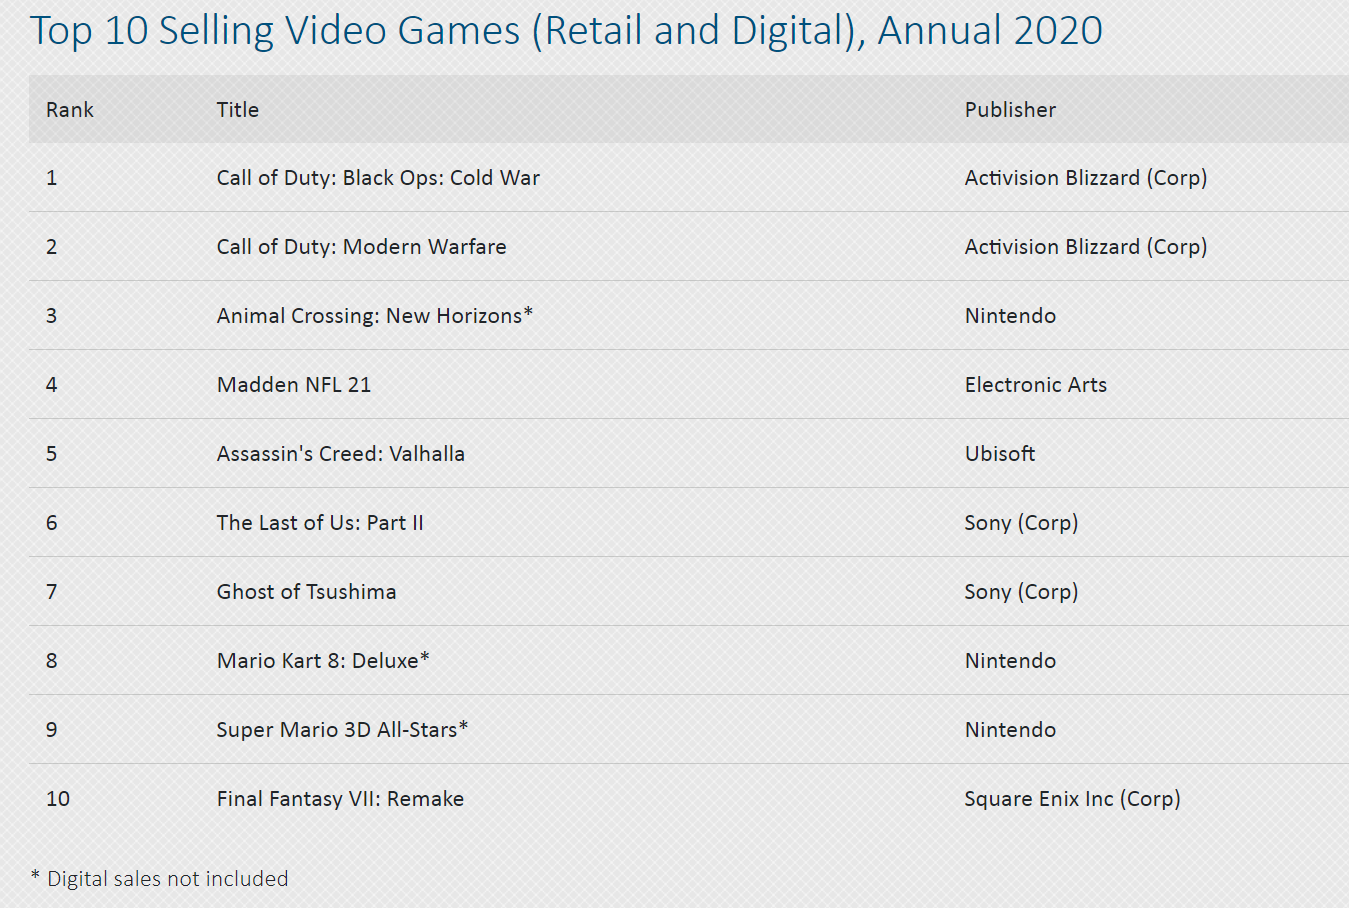

Source : https://www.npd.com/wps/portal/npd/us/news/top-10/video-games/

2020ÎÖÑÏùò Îß§Ï∂ú ÏÉÅÏúÑ 10ÏúÑ Í≤åÏûÑÏùÑ Î≥¥Î©¥ Î∏îÎ¶¨ÏûêÎìú, Electronic Arts, Ubisoft, SonyÏùò Ïã§Ï†ÅÏù¥ Îçî Ï¢ãÎã§. Íµ≥Ïù¥ ÎãåÌÖêÎèÑÏôÄ ÏÜêÏû°ÏùÑ ÌïÑÏöîÎäî ÏóÜÍ≤†Îã§. 

Îß§Ï∂ú ÏÉÅÏúÑÍ∂åÏùÄ 7ÏúÑÏù∏ Í≥†Ïä§Ìä∏ Ïò§Î∏å Ïì∞ÏãúÎßà(Ïã†Í∑ú IP)Î•º Ï†úÏô∏ÌïòÍ≥† Îã§ ÏãúÎ¶¨Ï¶à ÌîÑÎûúÏ∞®Ïù¥Ï¶à Í≤åÏûÑÏù¥Îã§. 

Îã§Îì§ ÏãúÎ¶¨Ï¶àÎ•º Ïö∞Î†§Î®πÍ≥† ÏûàÎã§. ÏïàÏ†ÑÌï¥ÏÑúÏùºÍπå? 

2020ÎÖÑÏóêÎäî ÏΩú Ïò§Î∏å ÎìÄÌã∞Ïùò Îß§Ï∂úÏù¥ Í∞ÄÏû• Ï¢ãÏïòÎã§. Í∑∏Î†áÎã§Í≥† ÎÇ¥ÎÖÑÏóê Îòê ÎÇº ÏàòÎäî ÏóÜÎäî Î≤ï...! Ìè¨ÏºìÎ™¨Ïùò ÏãúÎåÄÍ∞Ä Ïò§ÎäîÍ∞Ä...!

# Í∞úÏù∏Ï†ÅÏù∏ Î∂ÑÏÑù Î™©Ìëú, ÏßàÎ¨∏

In [ ]:
# Two Sample T-Test
import scipy.stats as stats
print("Î∂ÅÎØ∏ÏßÄÏó≠Í≥º ÏùºÎ≥∏ ÎπÑÍµê : ", stats.ttest_ind(df1genresum.NA_Sales, df1genresum.JP_Sales))

In [ ]:
print("Î∂ÅÎØ∏ÏßÄÏó≠Í≥º Ïú†ÎüΩ ÎπÑÍµê : ", stats.ttest_ind(df1genresum.NA_Sales, df1genresum.EU_Sales))

‚ÄºÔ∏è T-Test, ÏïÑÎÖ∏Î∞îÎäî ÌèâÍ∑† Îß§Í∏∞ÎäîÍ±∞ÏûÑ... Ïû•Î•¥Î≥Ñ Îû≠ÌÇπ ÏàúÏúÑÏóêÎäî Ï†ÅÌï©ÌïòÏßÄ ÏïäÎã§!

In [ ]:
# Anova

import scipy.stats as stats
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
F_statistic, pVal = stats.f_oneway(rank_by_sales.NA, rank_by_sales.EU, rank_by_sales.JP, rank_by_sales.Other) 
print('4Í∞ú Í∑∏Î£πÎç∞Ïù¥ÌÑ∞Ïùò ÏùºÏõêÎ∂ÑÏÇ∞Î∂ÑÏÑù Í≤∞Í≥º : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))

‚ùì Ïôú ÏïÑÎÖ∏Î∞î pÍ∞íÏù¥ Îã§ 1Ïù¥ ÎÇòÏò§ÏßÄ...
Îû≠ÌÇπ Îß§Í∏∞Î©¥ Îã§ Îû≠ÌÇπÏù¥ 1-12ÏúÑ ÏàúÏù¥Îùº pvalueÍ∞Ä ÎòëÍ∞ôÏù¥ ÎÇòÏò§ÎÇò?? 

4Í∞ú Í∑∏Î£πÏùò Ïû•Î•¥Î≥Ñ Îß§Ï∂ú ÏàúÏúÑÎ•º ÏïÑÎÖ∏Î∞î ÌÖåÏä§Ìä∏Î°ú ÎπÑÍµêÌïú Í≤∞Í≥º pvalueÎäî 1Ïù¥Îã§. 



‚ÄºÔ∏è Ï¥àÍ∏∞Ïóê ÏÑ§Ï†ïÌïú Î™©ÌëúÏóê ÎåÄÌïú Í≤∞Î°†Ïù¥ ÎÇòÏôÄÏïº Ìï®

Í∑∏ÎûòÏÑú Îã§Ïùå Î∂ÑÍ∏∞ÏóêÎäî Ïñ¥Îñ§ Í≤åÏûÑÏùÑ ÎßåÎì§Í±¥Îç∞?

Ïó∞ÎèÑÎ≥Ñ Ï∂úÏãúÎêòÎäî Í≤åÏûÑ ÏàòÏôÄ Îß§Ï∂úÏï° Ïó∞Í¥ÄÏÑ± ÎπÑÍµê - 2sample chi-square test

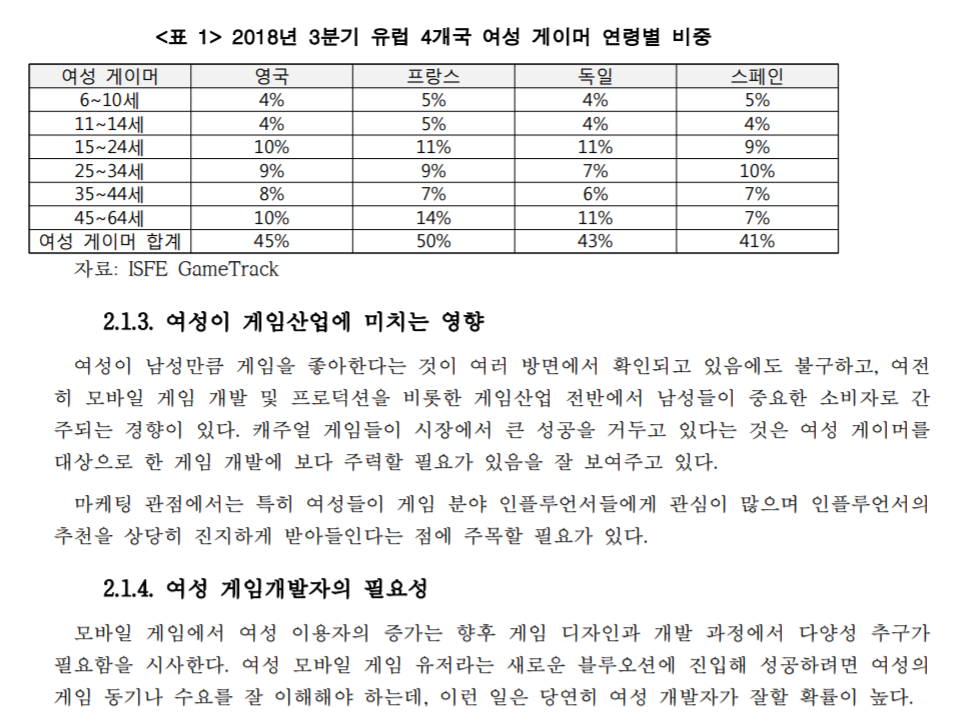

Ï∂úÏ≤ò : Î∂ÅÎØ∏ Î∞è Ïú†ÎüΩ Ï£ºÏöîÍµ≠ Í≤åÏûÑÏãúÏû• ÌòÑÌô©Ï°∞ÏÇ¨, 2019